In [87]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [88]:
data_sales = pd.read_csv('time_series_data_msba.csv')
data_stores = pd.read_csv('qualitative_data_msba.csv')

In [89]:
#Merging Data
df = data_stores.merge(data_sales, how = 'inner', on=['site_id_msba'])
pd.set_option('display.max_columns', None)
df.head()

open_year  square_feet  front_door_count  years_since_last_project  \
0       2021         5046                 2                         2   
1       2021         5046                 2                         2   
2       2021         5046                 2                         2   
3       2021         5046                 2                         2   
4       2021         5046                 2                         2   

   parking_spaces lottery freal bonfire_grill pizza cinnabon  \
0              38     Yes   Yes           Yes    No       No   
1              38     Yes   Yes           Yes    No       No   
2              38     Yes   Yes           Yes    No       No   
3              38     Yes   Yes           Yes    No       No   
4              38     Yes   Yes           Yes    No       No   

  godfather_s_pizza ethanol_free diesel_x hi_flow_lanes rv_lanes  \
0                No          Yes      Yes           Yes      Yes   
1                No          Yes      Yes           Yes      Yes   
2                No          Yes      Yes           Yes      Yes   
3                No          Yes      Yes           Yes      Yes   
4                No          Yes      Yes           Yes      Yes   

  hi_flow_rv_lanes  def cat_scales car_wash ev_charging rv_dumps propane  \
0              Yes  Yes         No       No          No      Yes     Yes   
1              Yes  Yes         No       No          No      Yes     Yes   
2              Yes  Yes         No       No          No      Yes     Yes   
3              Yes  Yes         No       No          No      Yes     Yes   
4              Yes  Yes         No       No          No      Yes     Yes   

   x1_mile_pop  x1_mile_emp  x1_mile_income  x1_2_mile_pop  x1_2_mile_emp  \
0         4046         3648           43435            556            642   
1         4046         3648           43435            556            642   
2         4046         3648           43435            556            642   
3         4046         3648           43435            556            642   
4         4046         3648           43435            556            642   

   x1_2_mile_income  x5_min_pop  x5_min_emp  x5_min_inc  x7_min_pop  \
0             45678        4776        5364       41725       13895   
1             45678        4776        5364       41725       13895   
2             45678        4776        5364       41725       13895   
3             45678        4776        5364       41725       13895   
4             45678        4776        5364       41725       13895   

   x7_min_emp  x7_min_inc  traditional_forecourt_fueling_positions  \
0        7906       46043                                       20   
1        7906       46043                                       20   
2        7906       46043                                       20   
3        7906       46043                                       20   
4        7906       46043                                       20   

  traditional_forecourt_layout traditional_forecourt_stack_type  \
0                        Stack                            Large   
1                        Stack                            Large   
2                        Stack                            Large   
3                        Stack                            Large   
4                        Stack                            Large   

   rv_lanes_fueling_positions rv_lanes_layout rv_lanes_stack_type  \
0                           6           Stack               HF/RV   
1                           6           Stack               HF/RV   
2                           6           Stack               HF/RV   
3                           6           Stack               HF/RV   
4                           6           Stack               HF/RV   

   hi_flow_lanes_fueling_positions hi_flow_lanes_layout  \
0                                4                Stack   
1                                4                Stack   
2      

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13542 entries, 0 to 13541
Data columns (total 64 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   open_year                                13542 non-null  int64  
 1   square_feet                              13542 non-null  int64  
 2   front_door_count                         13542 non-null  int64  
 3   years_since_last_project                 13542 non-null  int64  
 4   parking_spaces                           13542 non-null  int64  
 5   lottery                                  13542 non-null  object 
 6   freal                                    13542 non-null  object 
 7   bonfire_grill                            13542 non-null  object 
 8   pizza                                    13542 non-null  object 
 9   cinnabon                                 13542 non-null  object 
 10  godfather_s_pizza                        13542

In [91]:
#Replace nulls , rv_lanes_stack_type has some NA values and some None values
null_cols = ['hi_flow_lanes_layout','hi_flow_lanes_stack_type',
             'hi_flow_rv_lanes_layout','hi_flow_rv_lanes_stack_type',
             'rv_lanes_layout','rv_lanes_stack_type']
for col in null_cols:
    df[col].fillna("None", inplace=True)
#Fix calendar
df['calendar.calendar_day_date'] = pd.to_datetime(df['calendar.calendar_day_date'])
df['capital_projects.soft_opening_date'] = pd.to_datetime(df['capital_projects.soft_opening_date'])
# Calculate the difference in days and store it in a new column
df['days_open'] = (df['calendar.calendar_day_date'] - df['capital_projects.soft_opening_date']).dt.days
df['month'] = df['calendar.calendar_day_date'].dt.month
#Removing data for site id 21980, has exceptionally high diesel sales
df = df[df['site_id_msba'] != 21980]
#Remove attributes w/ one value
df.drop(['front_door_count', 'godfather_s_pizza',
              'diesel_x', 'non_24_hour', 'self_check_out',
              'car_wash', 'ev_charging'], axis = 1, inplace=True)
df = df.rename(columns={"daily_yoy_ndt.total_inside_sales": "sales", "daily_yoy_ndt.total_food_service": "food",
                       "calendar.calendar_day_date": "date"})

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13176 entries, 0 to 13541
Data columns (total 59 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   open_year                                13176 non-null  int64         
 1   square_feet                              13176 non-null  int64         
 2   years_since_last_project                 13176 non-null  int64         
 3   parking_spaces                           13176 non-null  int64         
 4   lottery                                  13176 non-null  object        
 5   freal                                    13176 non-null  object        
 6   bonfire_grill                            13176 non-null  object        
 7   pizza                                    13176 non-null  object        
 8   cinnabon                                 13176 non-null  object        
 9   ethanol_free                           

In [93]:
df.head(5)

open_year  square_feet  years_since_last_project  parking_spaces lottery  \
0       2021         5046                         2              38     Yes   
1       2021         5046                         2              38     Yes   
2       2021         5046                         2              38     Yes   
3       2021         5046                         2              38     Yes   
4       2021         5046                         2              38     Yes   

  freal bonfire_grill pizza cinnabon ethanol_free hi_flow_lanes rv_lanes  \
0   Yes           Yes    No       No          Yes           Yes      Yes   
1   Yes           Yes    No       No          Yes           Yes      Yes   
2   Yes           Yes    No       No          Yes           Yes      Yes   
3   Yes           Yes    No       No          Yes           Yes      Yes   
4   Yes           Yes    No       No          Yes           Yes      Yes   

  hi_flow_rv_lanes  def cat_scales rv_dumps propane  x1_mile_pop  x1_mile_emp  \
0              Yes  Yes         No      Yes     Yes         4046         3648   
1              Yes  Yes         No      Yes     Yes         4046         3648   
2              Yes  Yes         No      Yes     Yes         4046         3648   
3              Yes  Yes         No      Yes     Yes         4046         3648   
4              Yes  Yes         No      Yes     Yes         4046         3648   

   x1_mile_income  x1_2_mile_pop  x1_2_mile_emp  x1_2_mile_income  x5_min_pop  \
0           43435            556            642             45678        4776   
1           43435            556            642             45678        4776   
2           43435            556            642             45678        4776   
3           43435            556            642             45678        4776   
4           43435            556            642             45678        4776   

   x5_min_emp  x5_min_inc  x7_min_pop  x7_min_emp  x7_min_inc  \
0        5364       41725       13895        7906       46043   
1        5364       41725       13895        7906       46043   
2        5364       41725       13895        7906       46043   
3        5364       41725       13895        7906       46043   
4        5364       41725       13895        7906       46043   

   traditional_forecourt_fueling_positions traditional_forecourt_layout  \
0                                       20                        Stack   
1                                       20                        Stack   
2                                       20                        Stack   
3                                       20                        Stack   
4                                       20                        Stack   

  traditional_forecourt_stack_type  rv_lanes_fueling_positions  \
0                            Large                           6   
1                            Large                           6   
2                            Large                           6   
3                            Large                           6   
4                            Large                           6   

  rv_lanes_layout rv_lanes_stack_type  hi_flow_lanes_fueling_positions  \
0           Stack               HF/RV                                4   
1           Stack               HF/RV                                4   
2           Stack               HF/RV                                4   
3           Stack               HF/RV                                4   
4           Stack               HF/RV                                4   

  hi_flow_lanes_layout hi_flow_lanes_stack_type  \
0                Stack                    HF/RV   
1                Stack                    HF/RV   
2                Stack                    HF/RV   
3                Stack                    HF/RV   
4                Stack                    HF/RV   

   hi_flow_lanes_fueling_positions_2  rv_lanes_fueling_positions_2  \
0                                  4

array([[<Axes: >],
       [<Axes: >],
       [<Axes: >],
       [<Axes: >]], dtype=object)

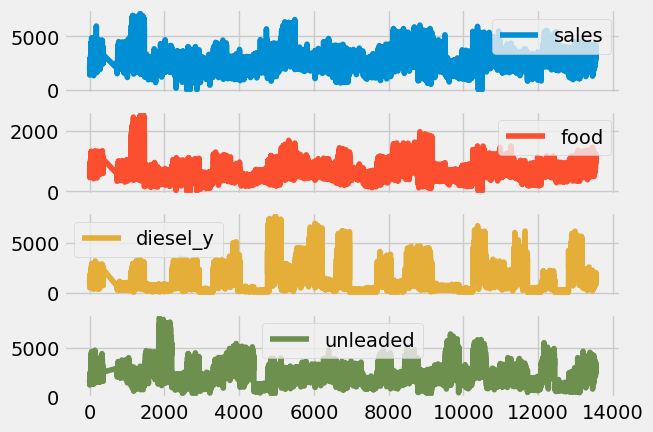

In [94]:
df[["sales", "food", "diesel_y", "unleaded"]].plot(subplots = True, layout=(4,1))

In [95]:
#SINGLE SITE
df2 = df[df["site_id_msba"] == 21560]
df2

open_year  square_feet  years_since_last_project  parking_spaces lottery  \
0         2021         5046                         2              38     Yes   
1         2021         5046                         2              38     Yes   
2         2021         5046                         2              38     Yes   
3         2021         5046                         2              38     Yes   
4         2021         5046                         2              38     Yes   
..         ...          ...                       ...             ...     ...   
361       2021         5046                         2              38     Yes   
362       2021         5046                         2              38     Yes   
363       2021         5046                         2              38     Yes   
364       2021         5046                         2              38     Yes   
365       2021         5046                         2              38     Yes   

    freal bonfire_grill pizza cinnabon ethanol_free hi_flow_lanes rv_lanes  \
0     Yes           Yes    No       No          Yes           Yes      Yes   
1     Yes           Yes    No       No          Yes           Yes      Yes   
2     Yes           Yes    No       No          Yes           Yes      Yes   
3     Yes           Yes    No       No          Yes           Yes      Yes   
4     Yes           Yes    No       No          Yes           Yes      Yes   
..    ...           ...   ...      ...          ...           ...      ...   
361   Yes           Yes    No       No          Yes           Yes      Yes   
362   Yes           Yes    No       No          Yes           Yes      Yes   
363   Yes           Yes    No       No          Yes           Yes      Yes   
364   Yes           Yes    No       No          Yes           Yes      Yes   
365   Yes           Yes    No       No          Yes           Yes      Yes   

    hi_flow_rv_lanes  def cat_scales rv_dumps propane  x1_mile_pop  \
0                Yes  Yes         No      Yes     Yes         4046   
1                Yes  Yes         No      Yes     Yes         4046   
2                Yes  Yes         No      Yes     Yes         4046   
3                Yes  Yes         No      Yes     Yes         4046   
4                Yes  Yes         No      Yes     Yes         4046   
..               ...  ...        ...      ...     ...          ...   
361              Yes  Yes         No      Yes     Yes         4046   
362              Yes  Yes         No      Yes     Yes         4046   
363              Yes  Yes         No      Yes     Yes         4046   
364              Yes  Yes         No      Yes     Yes         4046   
365              Yes  Yes         No      Yes     Yes         4046   

     x1_mile_emp  x1_mile_income  x1_2_mile_pop  x1_2_mile_emp  \
0           3648           43435            556            642   
1           3648           43435            556            642   
2           3648           43435            556            642   
3           3648           43435            556            642   
4           3648           43435            556            642   
..           ...             ...            ...            ...   
361         3648           43435            556            642   
362         3648           43435            556            642   
363         3648           43435            556            642   
364         3648           43435            556            642   
365         3648           43435            556            642   

     x1_2_mile_income  x5_min_pop  x5_min_emp  x5_min_inc  x7_min_pop  \
0               45678        4776        5364       41725       13895   
1               45678        4776        5364       41725       13895   
2               45678        4776        5364       41725       13895   
3               45678        4776        5364       41725       13895   
4               45678        4776        5364       41725       13895   
..                ...  

array([[<Axes: >],
       [<Axes: >],
       [<Axes: >],
       [<Axes: >]], dtype=object)

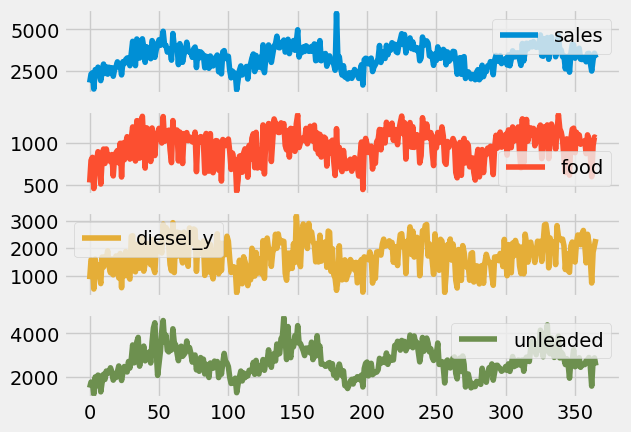

In [96]:
df2[["sales", "food", "diesel_y", "unleaded"]].plot(subplots = True, layout=(4,1))

In [97]:
df.site_id_msba.unique()
df.index = df['date']

array([21560, 22015, 22085, 22120, 22260, 22330, 22400, 22505, 22540,
       22575, 22645, 22680, 22715, 22750, 22785, 22820, 22855, 22890,
       22925, 23135, 23240, 23345, 23380, 23415, 23450, 23485, 23555,
       23660, 23730, 23765, 23835, 23905, 24150, 24220, 24255, 24535])

In [98]:
train = df[df["site_id_msba"] <= 23730]
test = df[df["site_id_msba"] > 23730]

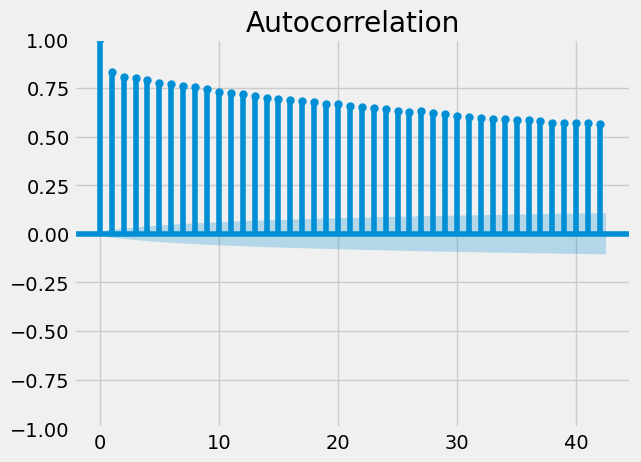

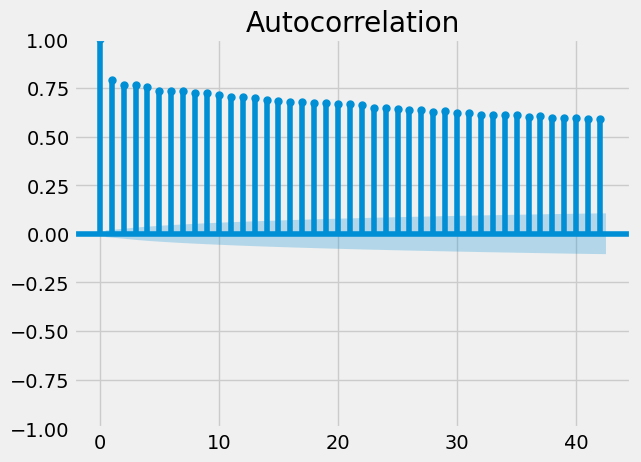

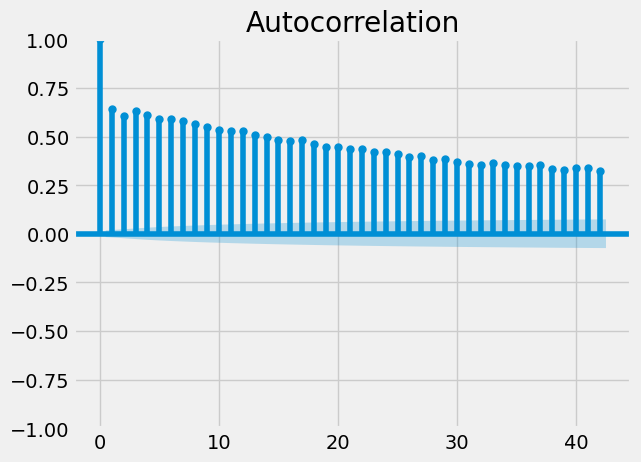

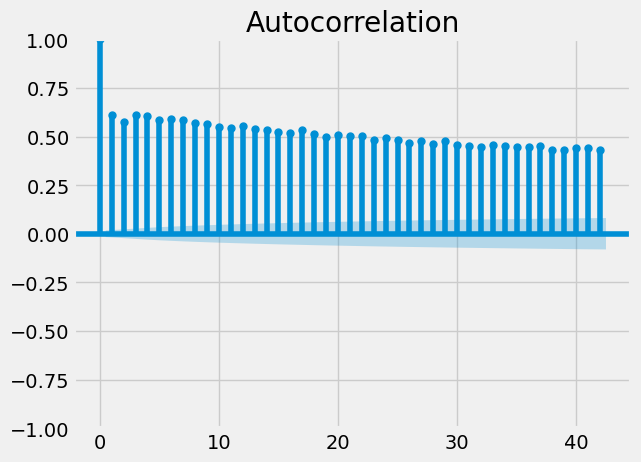

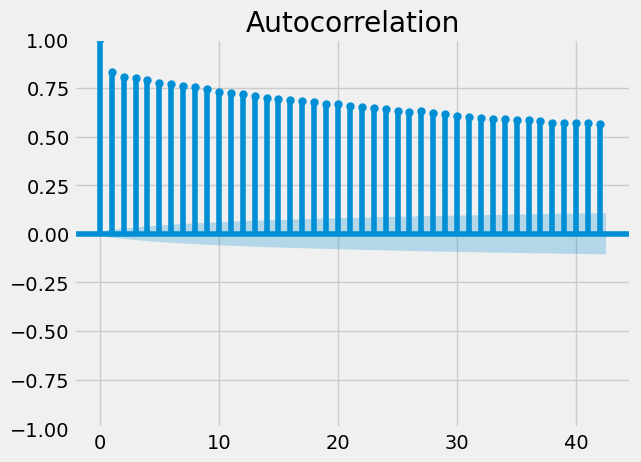

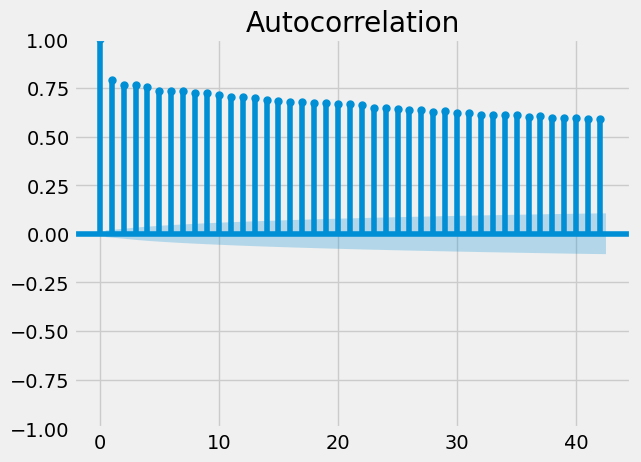

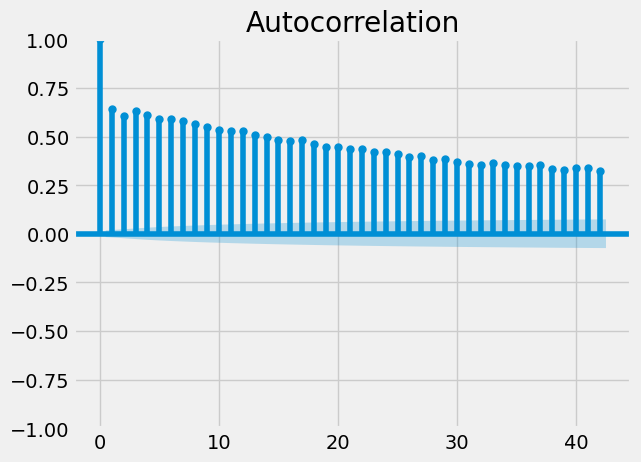

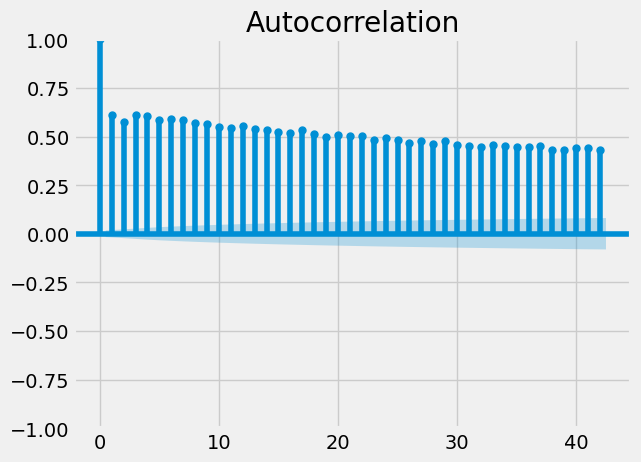

In [99]:
from statsmodels. graphics. tsaplots import plot_acf
plot_acf(df.unleaded)
plot_acf(df.diesel_y)
plot_acf(df.sales)
plot_acf(df.food)

In [100]:
#Model
#The parameters of the ARIMA model are defined as follows:

#p: The number of lag observations included in the model, also called the lag order.
#d: The number of times that the raw observations are differenced, also called the degree of differencing.
#q: The size of the moving average window, also called the order of moving average.

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_error
import math

train_arima = train['sales']
test_arima = test['sales']

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
#model = ARIMA(history, order=(2,1,3))
#model_fit = model.fit()
#yhat = model_fit.forecast()[0]
#predictions.append(yhat)
#history.append(y[0])

In [17]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(2,1,3))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

In [19]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# walk-forward validation
for t in range(len(y)):
 model = ARIMA(history, order=(2,1,3))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = y[t]
 history.append(obs)
 #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()

/var/folders/_7/b_6zfg8j7xnf6rxydgzcgj100000gn/T/ipykernel_1513/488083514.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


KeyboardInterrupt: 

In [20]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))
r2 = r2_score(y, predictions)
print('R2: '+str(r2))

ValueError: Found input variables with inconsistent numbers of samples: [2562, 5155]

In [140]:
# going to have to remove other sales data in test dataset
# replace soft open column with a days since calculation
# need to create 4 models
# look at stationary plot of the sales values
# try doing just one store
# exclude 21980

In [101]:
#XGBOOST
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
!pip install xgboost
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [102]:
# Separating data for different models
dfsales = df['sales']
dfgas = df['unleaded']
dffood = df['food']
dfdiesel = df['diesel_y']

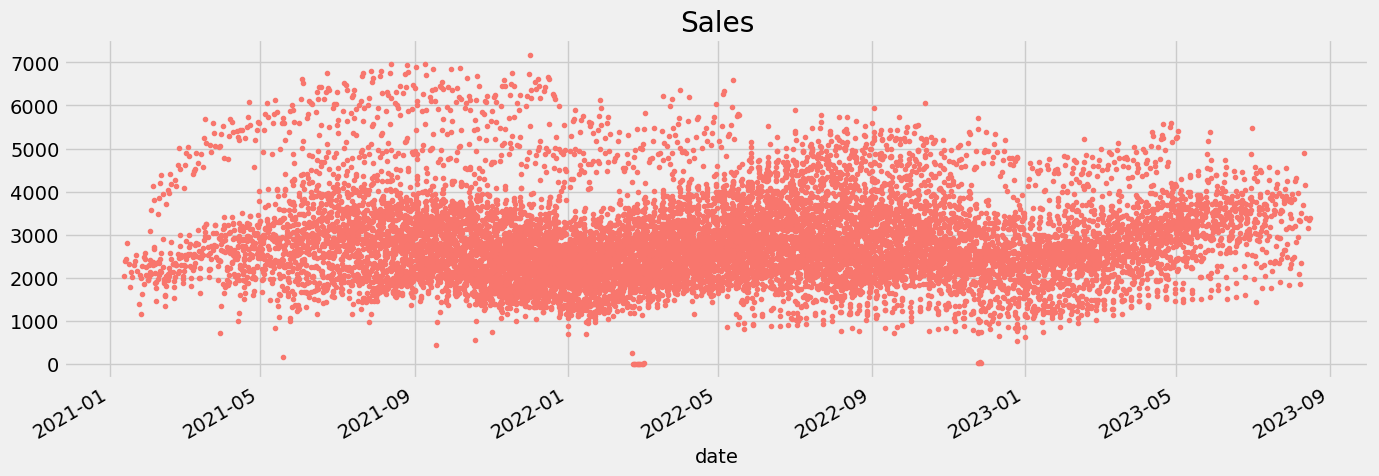

In [103]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = dfsales.plot(style='.', figsize=(15,5), color=color_pal[0], title='Sales')

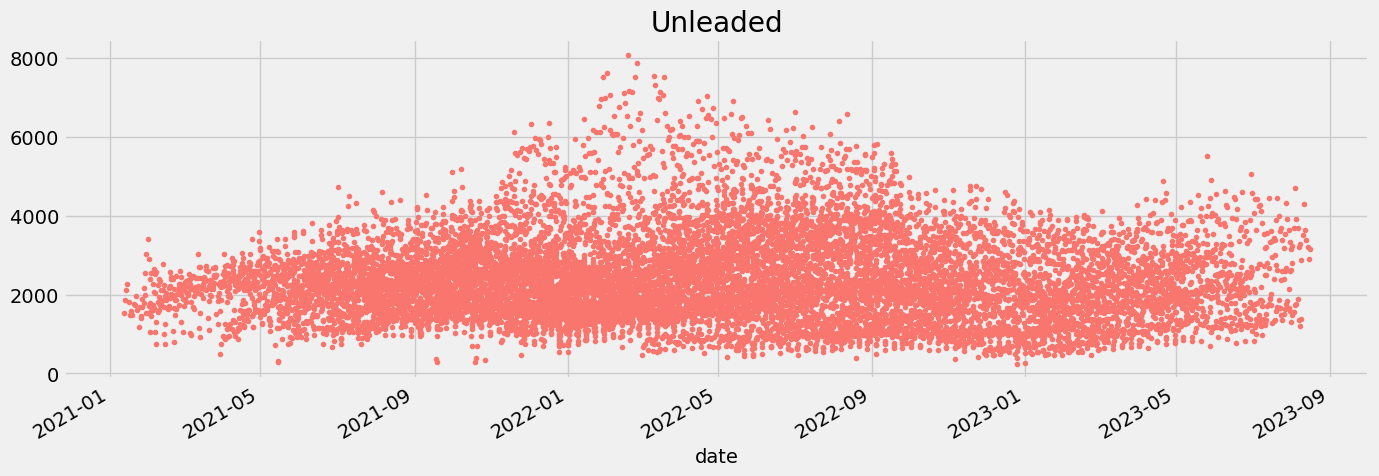

In [104]:
_ = dfgas.plot(style='.', figsize=(15,5), color=color_pal[0], title='Unleaded')

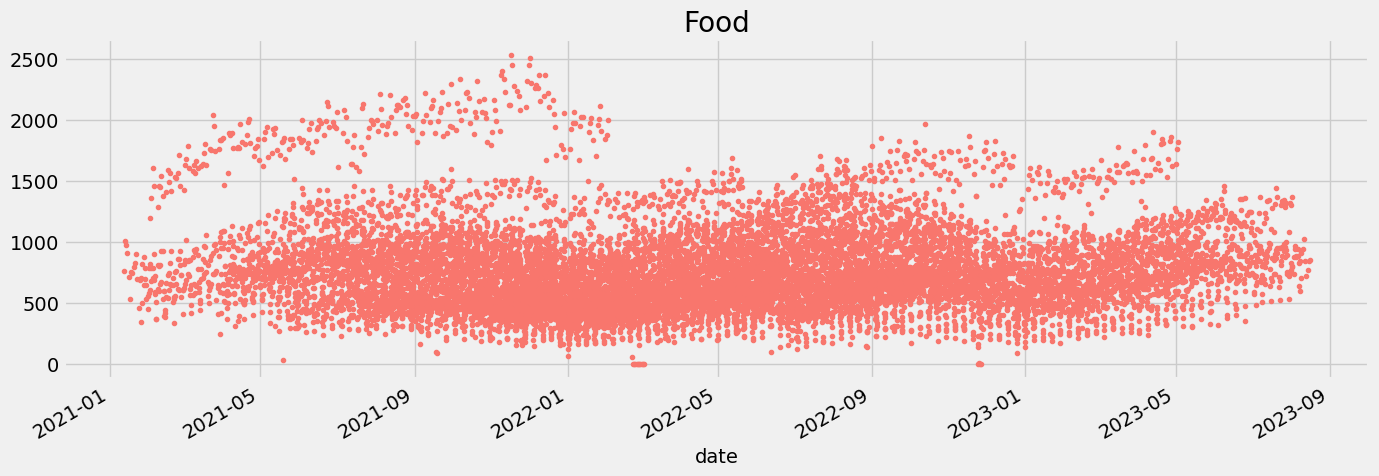

In [105]:
_ = dffood.plot(style='.', figsize=(15,5), color=color_pal[0], title='Food')

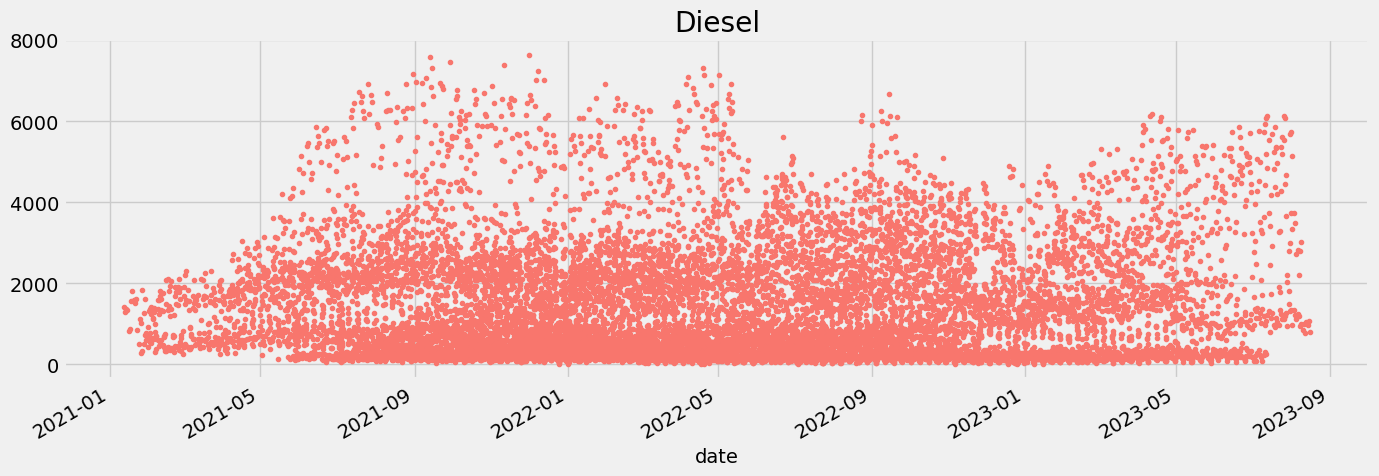

In [106]:
_ = dfdiesel.plot(style='.', figsize=(15,5), color=color_pal[0], title='Diesel')

In [107]:
#Tried 2 different train / test datasets
split_date = '2023-01-01'
train = dfsales.loc[dfsales.index <= split_date].copy()
test = dfsales.loc[dfsales.index > split_date].copy()
#train = df[df["site_id_msba"] <= 23730]
#test = df[df["site_id_msba"] > 23730]
#train = train['sales']
#test = test['sales']
train=train.to_frame()
test=test.to_frame()
traing = dfgas.loc[dfgas.index <= split_date].copy()
testg = dfgas.loc[dfgas.index > split_date].copy()
traing=traing.to_frame()
testg=testg.to_frame()
trainf = dffood.loc[dffood.index <= split_date].copy()
testf = dffood.loc[dffood.index > split_date].copy()
trainf=trainf.to_frame()
testf=testf.to_frame()
traind = dfdiesel.loc[dfdiesel.index <= split_date].copy()
testd = dfdiesel.loc[dfdiesel.index > split_date].copy()
traind=traind.to_frame()
testd=testd.to_frame()

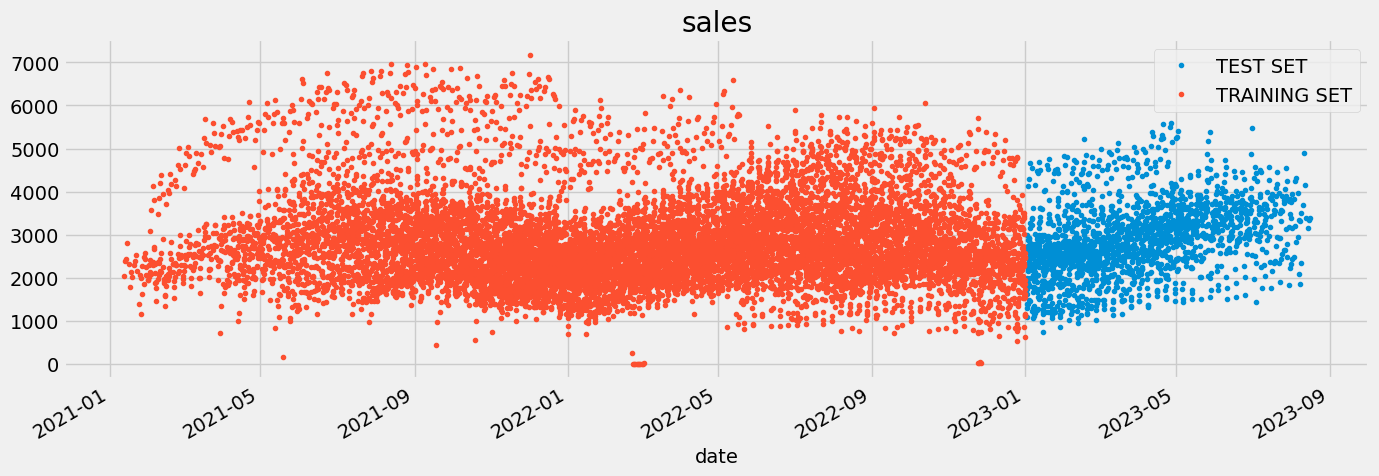

In [108]:
_ = test \
    .rename(columns={'sales': 'TEST SET'}) \
    .join(train.rename(columns={'sales': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='sales', style='.')

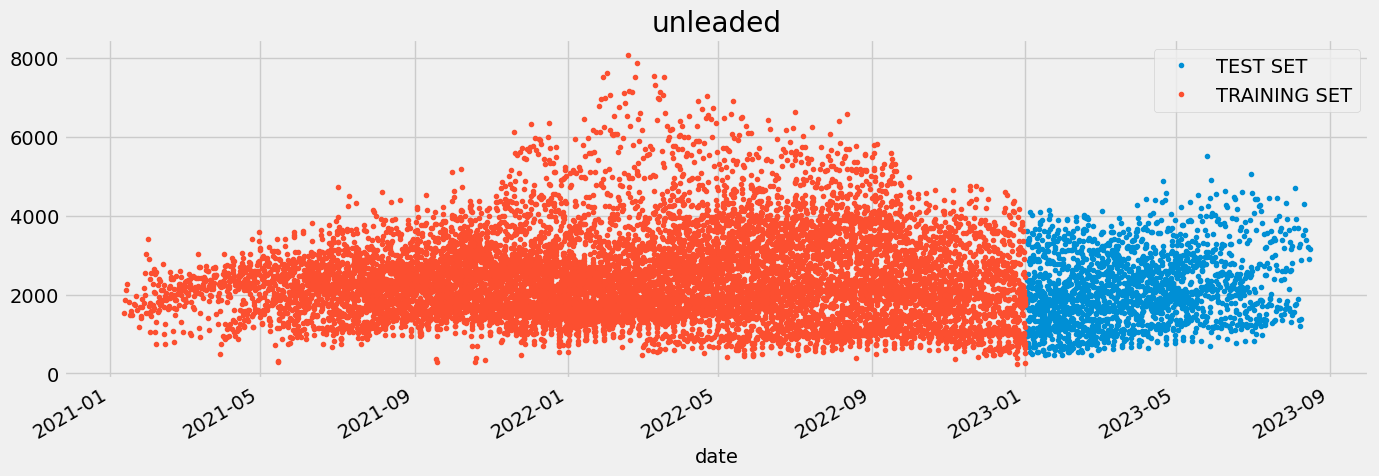

In [109]:
_ = testg \
    .rename(columns={'unleaded': 'TEST SET'}) \
    .join(traing.rename(columns={'unleaded': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='unleaded', style='.')

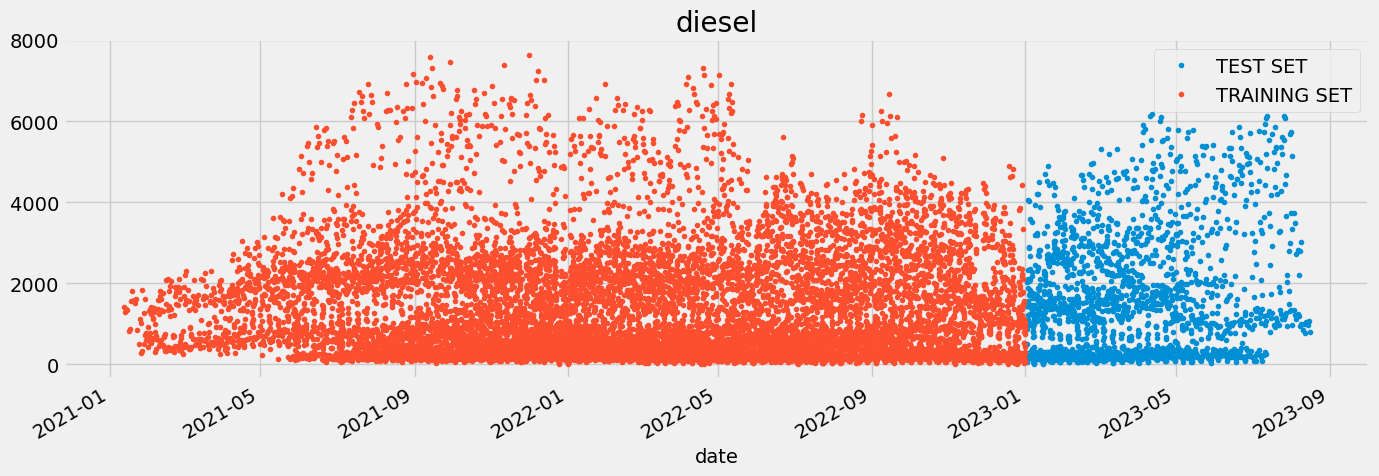

In [110]:
_ = testd \
    .rename(columns={'diesel_y': 'TEST SET'}) \
    .join(traind.rename(columns={'diesel_y': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='diesel', style='.')

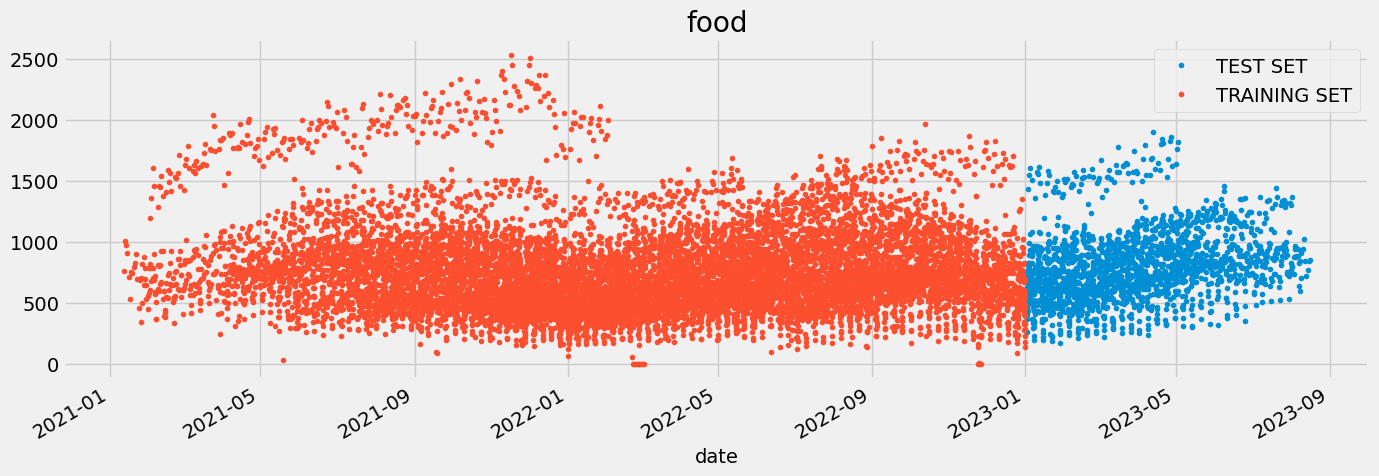

In [111]:
_ = testf \
    .rename(columns={'food': 'TEST SET'}) \
    .join(trainf.rename(columns={'food': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='food', style='.')

In [112]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [113]:
X_train, y_train = create_features(train, label='sales')
X_test, y_test = create_features(test, label='sales')
X_traing, y_traing = create_features(traing, label='unleaded')
X_testg, y_testg = create_features(testg, label='unleaded')
X_traind, y_traind = create_features(traind, label='diesel_y')
X_testd, y_testd = create_features(testd, label='diesel_y')
X_trainf, y_trainf = create_features(trainf, label='food')
X_testf, y_testf = create_features(testf, label='food')

/var/folders/_7/b_6zfg8j7xnf6rxydgzcgj100000gn/T/ipykernel_1513/2969650220.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear
/var/folders/_7/b_6zfg8j7xnf6rxydgzcgj100000gn/T/ipykernel_1513/2969650220.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear
/var/folders/_7/b_6zfg8j7xnf6rxydgzcgj100000gn/T/ipykernel_1513/2969650220.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear
/var/folders/_7/b_6zfg8j7xnf6rxydgzcgj100000gn/T/ipykernel_1513/2969650220.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'

In [114]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

/Users/macbookair/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [115]:
regg = xgb.XGBRegressor(n_estimators=1000)
regg.fit(X_traing, y_traing,
        eval_set=[(X_traing, y_traing), (X_testg, y_testg)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [116]:
regd = xgb.XGBRegressor(n_estimators=1000)
regd.fit(X_traind, y_traind,
        eval_set=[(X_traind, y_traind), (X_testd, y_testd)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [117]:
regf = xgb.XGBRegressor(n_estimators=1000)
regf.fit(X_trainf, y_trainf,
        eval_set=[(X_trainf, y_trainf), (X_testf, y_testf)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

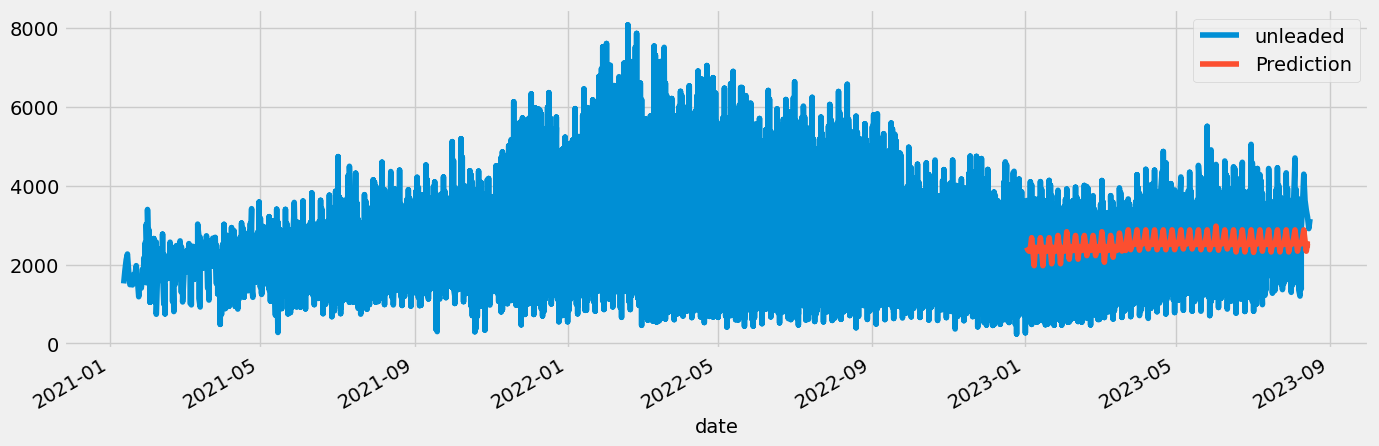

In [118]:
testg['Prediction'] = regg.predict(X_testg)
allg = pd.concat([testg, traing], sort=False)
_ = allg[['unleaded','Prediction']].plot(figsize=(15, 5))

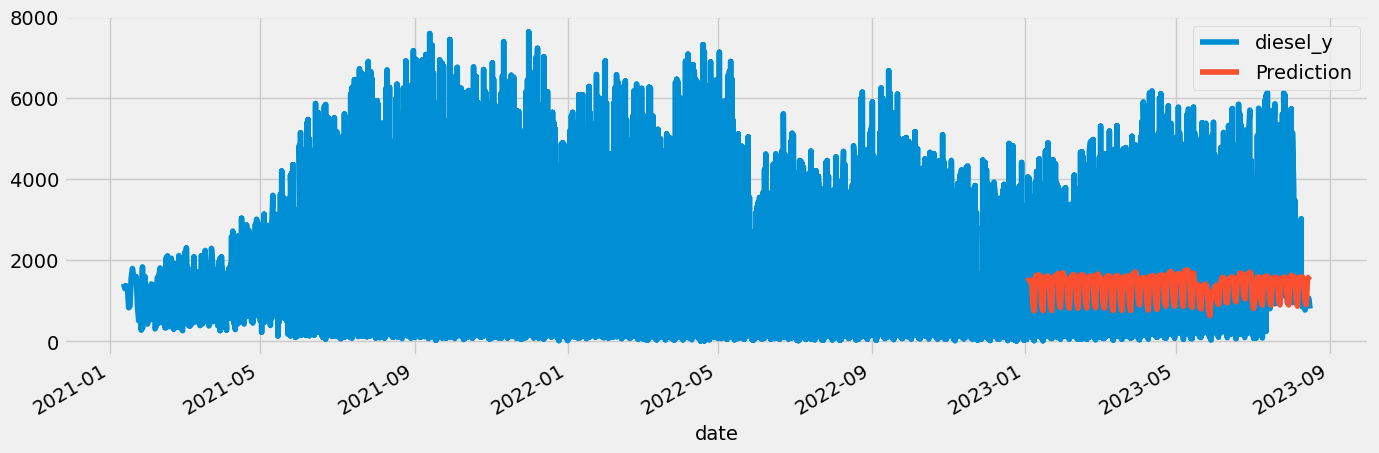

In [119]:
testd['Prediction'] = regd.predict(X_testd)
alld = pd.concat([testd, traind], sort=False)
_ = alld[['diesel_y','Prediction']].plot(figsize=(15, 5))

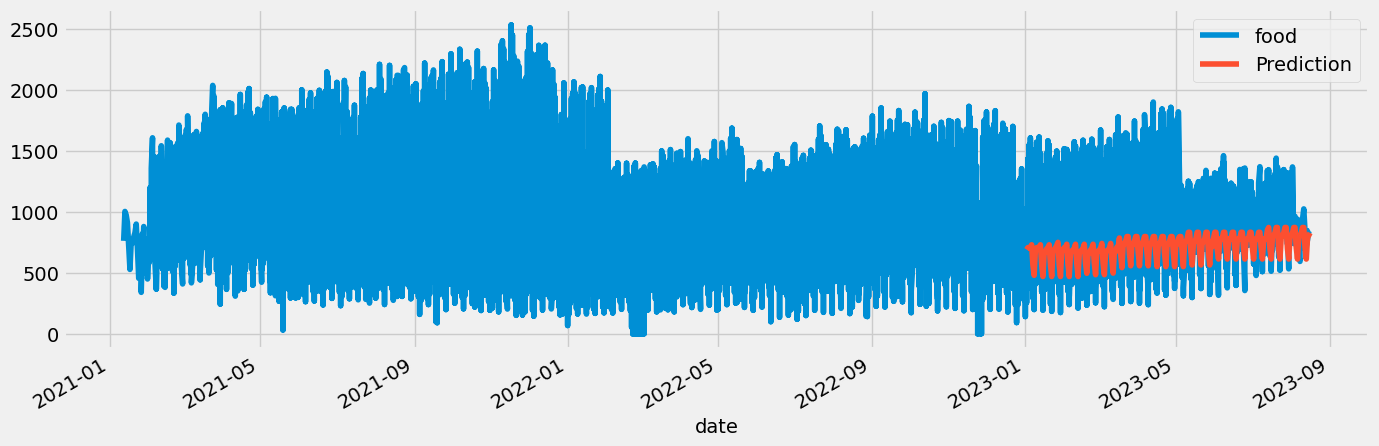

In [120]:
testf['Prediction'] = regf.predict(X_testf)
allf = pd.concat([testf, trainf], sort=False)
_ = allf[['food','Prediction']].plot(figsize=(15, 5))

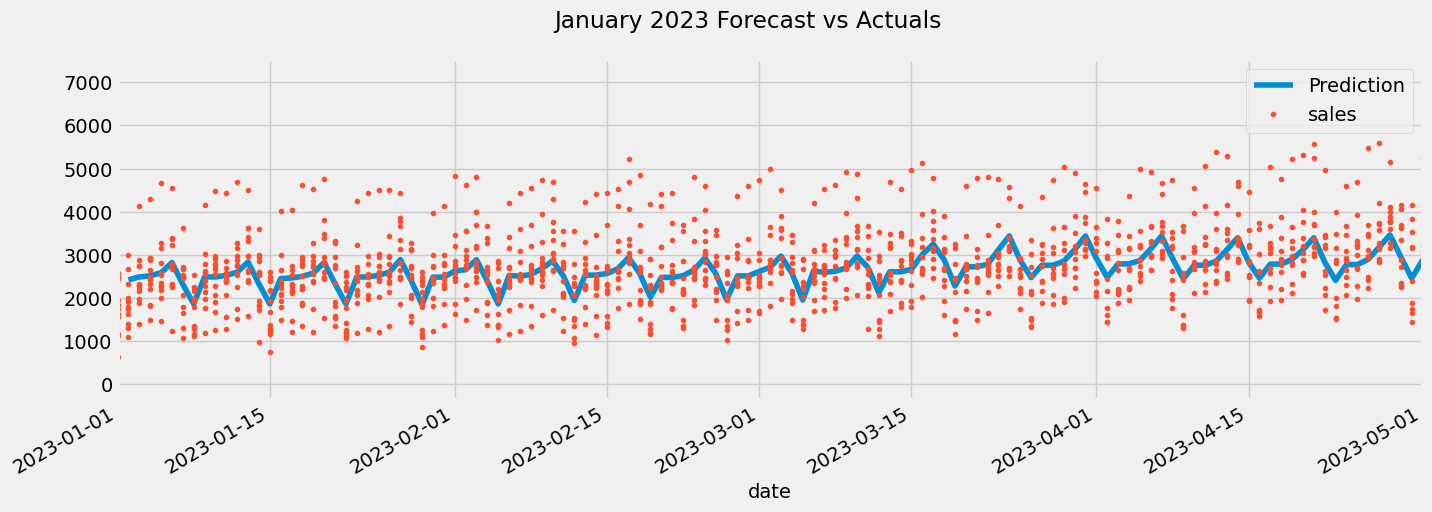

In [121]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = all[['Prediction','sales']].plot(ax=ax,style=['-','.'])
ax.set_xbound(lower=(pd.to_datetime('2023-01-01')), upper=pd.to_datetime('2023-05-01'))
plot = plt.suptitle('January 2023 Forecast vs Actuals')

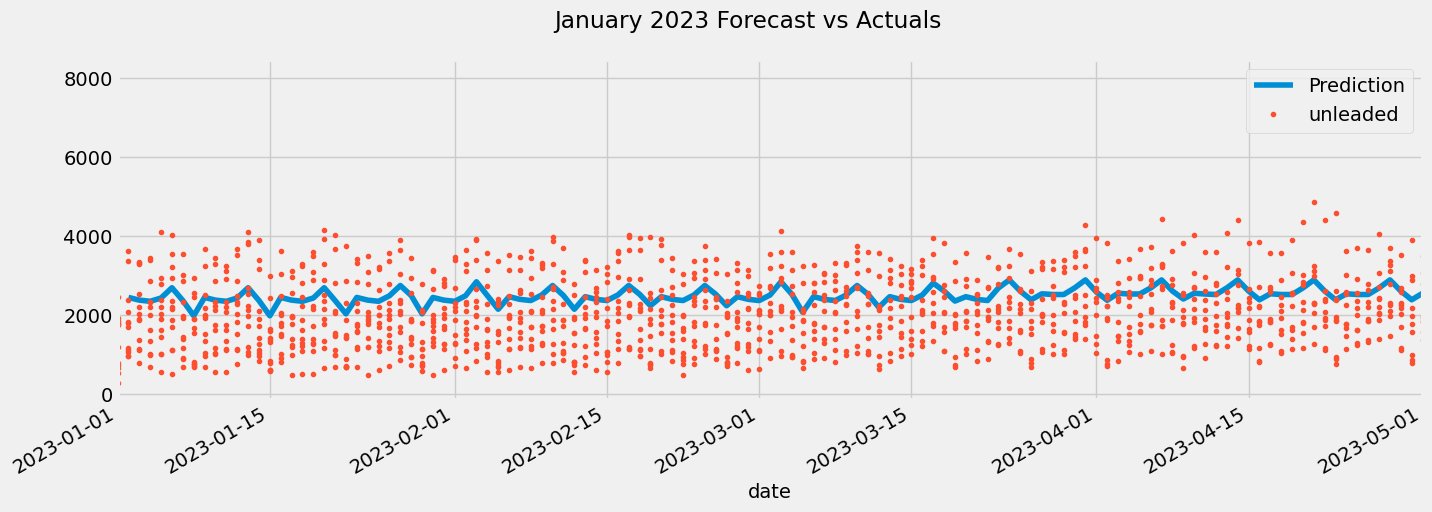

In [122]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = allg[['Prediction','unleaded']].plot(ax=ax,style=['-','.'])
ax.set_xbound(lower=(pd.to_datetime('2023-01-01')), upper=pd.to_datetime('2023-05-01'))
plot = plt.suptitle('January 2023 Forecast vs Actuals')

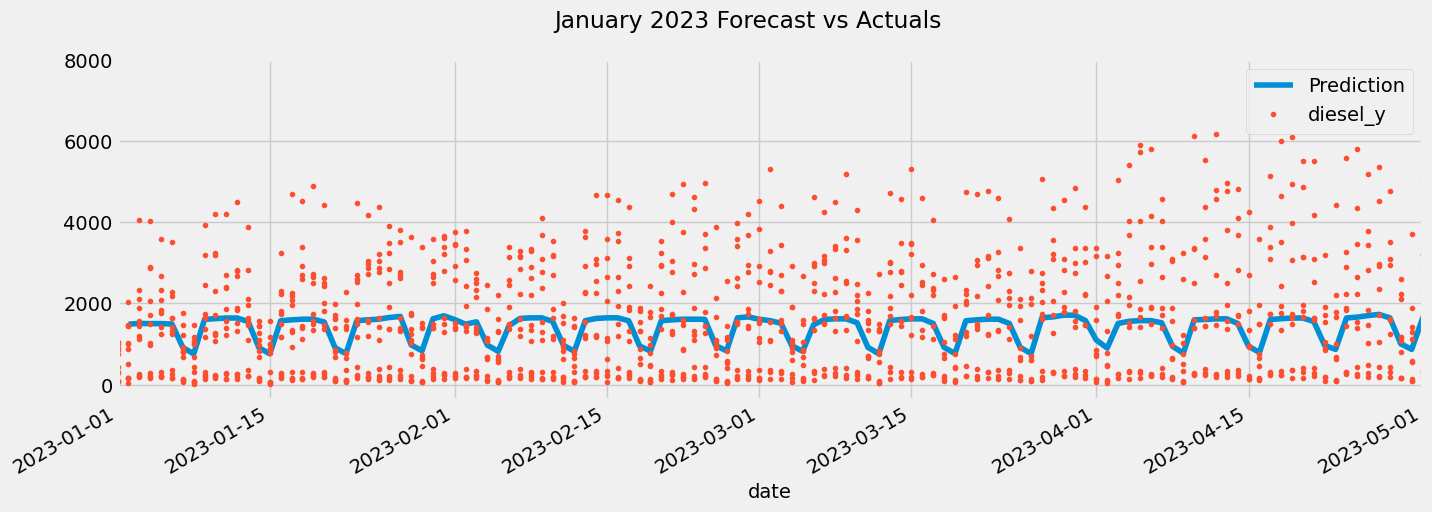

In [123]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = alld[['Prediction','diesel_y']].plot(ax=ax,style=['-','.'])
ax.set_xbound(lower=(pd.to_datetime('2023-01-01')), upper=pd.to_datetime('2023-05-01'))
plot = plt.suptitle('January 2023 Forecast vs Actuals')

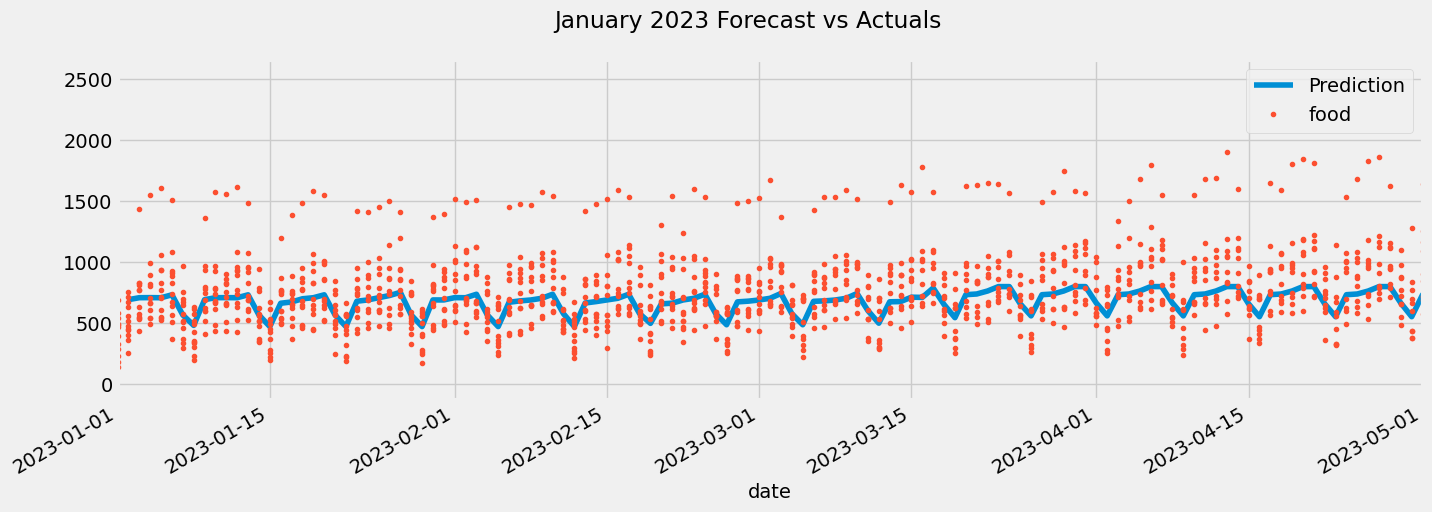

In [124]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = allf[['Prediction','food']].plot(ax=ax,style=['-','.'])
ax.set_xbound(lower=(pd.to_datetime('2023-01-01')), upper=pd.to_datetime('2023-05-01'))
plot = plt.suptitle('January 2023 Forecast vs Actuals')

In [125]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [128]:
MSE = mean_squared_error(y_true=test['sales'],
                   y_pred=test['Prediction'])
MSE
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
mean_absolute_error(y_true=test['sales'],
                   y_pred=test['Prediction'])
mean_absolute_percentage_error(y_true=test['sales'],
                   y_pred=test['Prediction'])

KeyError: 'Prediction'

In [127]:
MSE = mean_squared_error(y_true=testg['unleaded'],
                   y_pred=testg['Prediction'])
MSE
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
mean_absolute_error(y_true=testg['unleaded'],
                   y_pred=testg['Prediction'])
mean_absolute_percentage_error(y_true=testg['unleaded'],
                   y_pred=testg['Prediction'])

889623.0997374117

Root Mean Square Error:

943.1983353131046


798.8283663149844

55.48161234016605

In [60]:
MSE = mean_squared_error(y_true=testf['food'],
                   y_pred=testf['Prediction'])
MSE
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
mean_absolute_error(y_true=testf['food'],
                   y_pred=testf['Prediction'])
mean_absolute_percentage_error(y_true=testf['food'],
                   y_pred=testf['Prediction'])

66861.6130591367

Root Mean Square Error:

258.576126235847


188.35141840157476

24.457558676312274

In [286]:
MSE = mean_squared_error(y_true=testd['diesel_y'],
                   y_pred=testd['Prediction'])
MSE
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
mean_absolute_error(y_true=testd['diesel_y'],
                   y_pred=testd['Prediction'])
mean_absolute_percentage_error(y_true=testd['diesel_y'],
                   y_pred=testd['Prediction'])

2174160.119344954

Root Mean Square Error:

1474.5033466713305


1133.2611597012426

233.7745406499418

In [ ]:
## Further testing in below cells
_ = plot_importance(reg, height=0.9) #original model

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = all[['Prediction','sales']].plot(ax=ax,style=['-','.'])
ax.set_xbound(lower=(pd.to_datetime('2023-01-01')), upper=pd.to_datetime('2023-01-08'))
plot = plt.suptitle('First Week of January Forecast vs Actuals')

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = all[['Prediction','sales']].plot(ax=ax,style=['-','.'])
ax.set_xbound(lower=(pd.to_datetime('2023-07-01')), upper=pd.to_datetime('2023-07-08'))
plot = plt.suptitle('First Week of July Forecast vs Actuals')

In [ ]:
test['error'] = test['sales'] - test['Prediction']
test['abs_error'] = test['error'].apply(np.abs)
error_by_day = test.groupby(['year','month','dayofmonth']) \
    .mean()[['sales','Prediction','error','abs_error']]
# Over forecasted days
error_by_day.sort_values('error', ascending=True).head(10)

In [ ]:
# Worst absolute predicted days
error_by_day.sort_values('abs_error', ascending=False).head(10)

In [ ]:
# Best predicted days
error_by_day.sort_values('abs_error', ascending=True).head(10)

In [ ]:
######################################################
######################################################
######################################################
######################################################

In [265]:
model_df = df.copy()
model_df.set_index('date', inplace = True)
model_df.drop(['capital_projects.soft_opening_date'], axis = 1, inplace=True)

In [266]:
model_df['site_id_msba'].nunique()

36

In [267]:
np.random.seed(1234)

unique_sites = model_df['site_id_msba'].unique()
np.random.shuffle(unique_sites)
random_unique_sites = unique_sites[:6]
test_sites = random_unique_sites.tolist()

print(test_sites)

[22540, 24535, 22750, 22015, 22260, 23905]


In [268]:
#Splitting the dataset into train and test sets based on site id

stores_for_testing = test_sites
stores_for_training = [x for x in unique_sites if x not in test_sites]

train_data = model_df[model_df['site_id_msba'].isin(stores_for_training)]
test_data = model_df[model_df['site_id_msba'].isin(stores_for_testing)]

In [269]:
# Get unique 'site_id_msba' values from test_data
unique_site_ids = test_data['site_id_msba'].unique()

# Create a dictionary to store the separate DataFrames
test_data_dict = {}

# Iterate through unique site IDs and create separate DataFrames
for idx, site_id in enumerate(unique_site_ids, start=1):
    # Filter the test_data for the current site_id
    test_data_site = test_data[test_data['site_id_msba'] == site_id]

    # Store the filtered DataFrame in the dictionary with a numerical key
    test_data_dict[idx] = test_data_site

# Access the separate DataFrames as test_data_1, test_data_2, test_data_3, etc.
# For example, to access test_data for 'site_id_msba' 1:
test_data_1 = test_data_dict[1]
test_data_2 = test_data_dict[2]
test_data_3 = test_data_dict[3]
test_data_4 = test_data_dict[4]
test_data_5 = test_data_dict[5]
test_data_6 = test_data_dict[6]

In [270]:
def create_model(df, label=None):
    
    X = df.loc[:, df.columns != label]
    
    if label:
        y = df[label]
        return X, y
    return X

In [274]:
train_xgb = train_data.copy()
test_xgb = test_data.copy()

In [275]:
cat_attribs = ['lottery','freal','bonfire_grill','pizza','cinnabon','ethanol_free',
               'hi_flow_lanes','def','cat_scales','rv_dumps','propane','traditional_forecourt_layout',
               'traditional_forecourt_stack_type','rv_lanes_layout','rv_lanes_stack_type','hi_flow_lanes_layout',
               'hi_flow_lanes_stack_type','calendar.day_of_week','calendar_information.holiday',
               'calendar_information.type_of_day','rv_lanes','hi_flow_rv_lanes','hi_flow_rv_lanes_layout',
               'hi_flow_rv_lanes_stack_type'
              ]
train_xgb[cat_attribs] = train_xgb[cat_attribs].astype('category')
test_xgb[cat_attribs] = test_xgb[cat_attribs].astype('category')

In [276]:
columns_to_remove = ['food', 'diesel_y', 'unleaded']
train_sales = train_xgb.drop(columns=columns_to_remove)
test_sales = test_xgb.drop(columns=columns_to_remove)

In [277]:
X_train, y_train = create_model(train_sales, label='sales')
X_test, y_test = create_model(test_sales, label='sales')

In [278]:
reg = xgb.XGBRegressor(n_estimators=1000, enable_categorical=True)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

/Users/macbookair/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

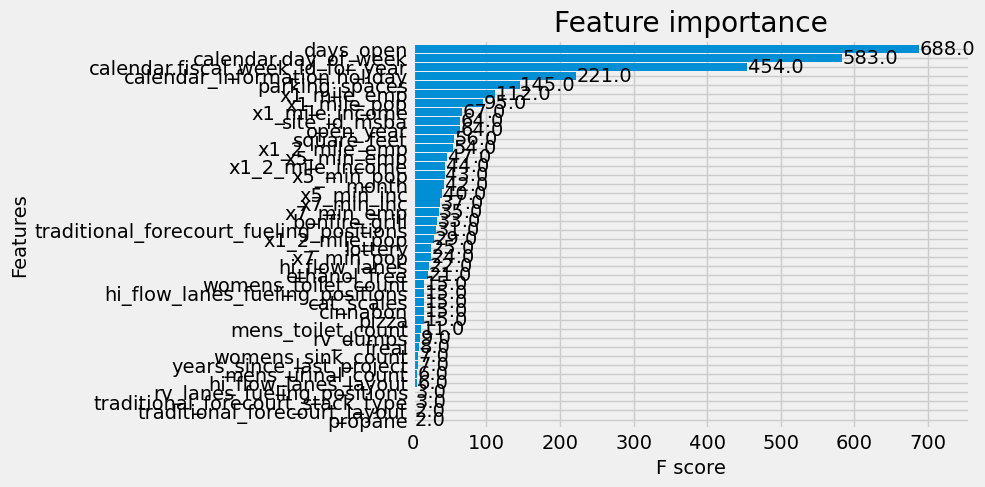

In [279]:
_ = plot_importance(reg, height=0.9)

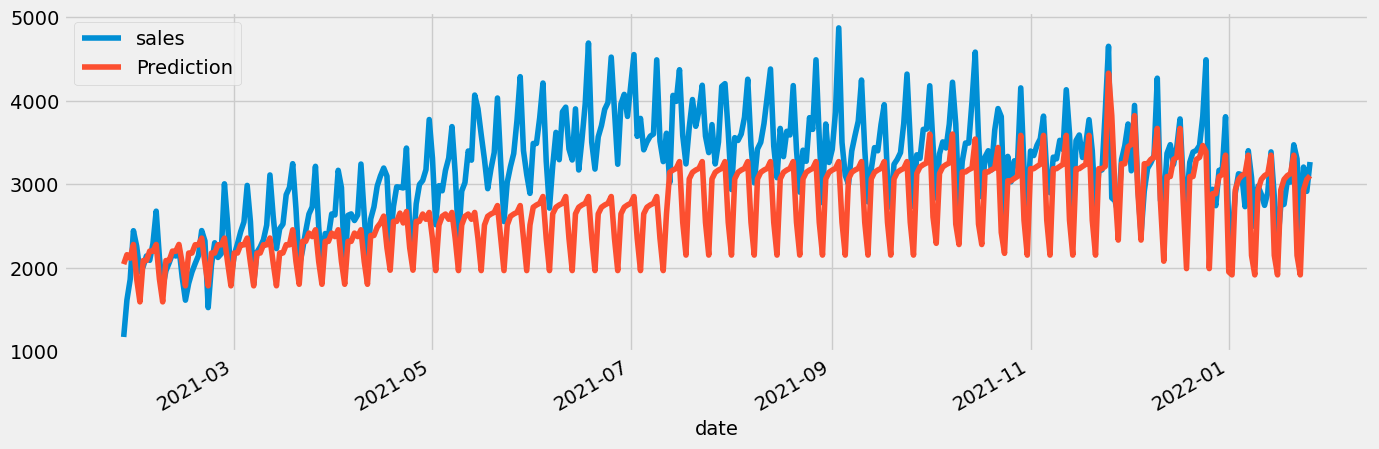

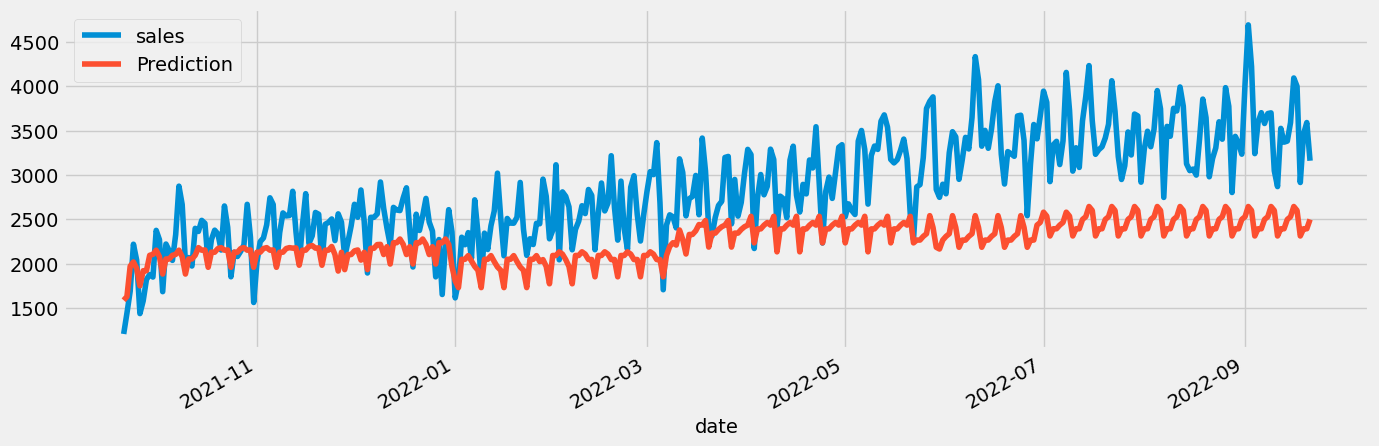

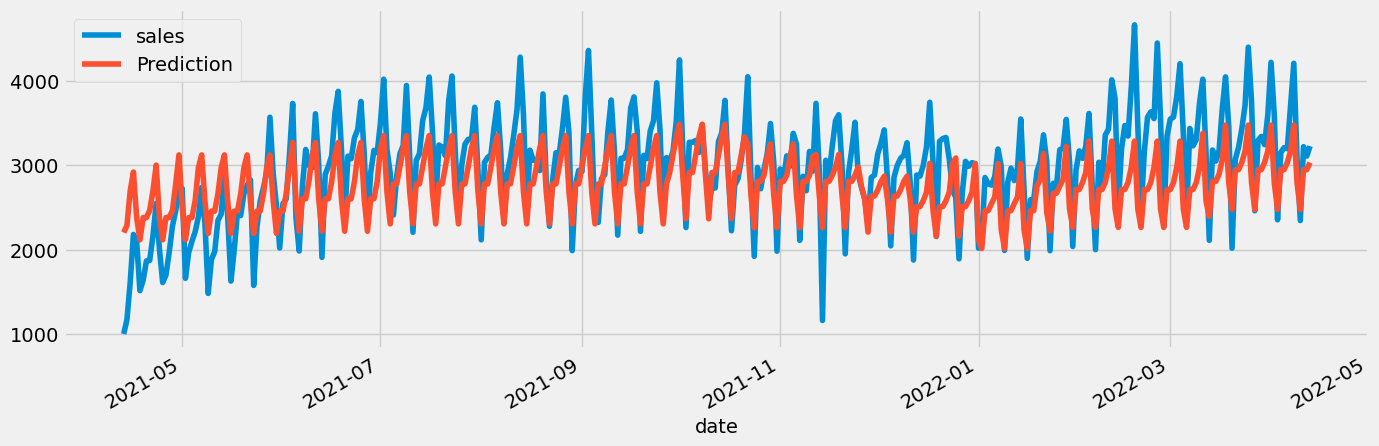

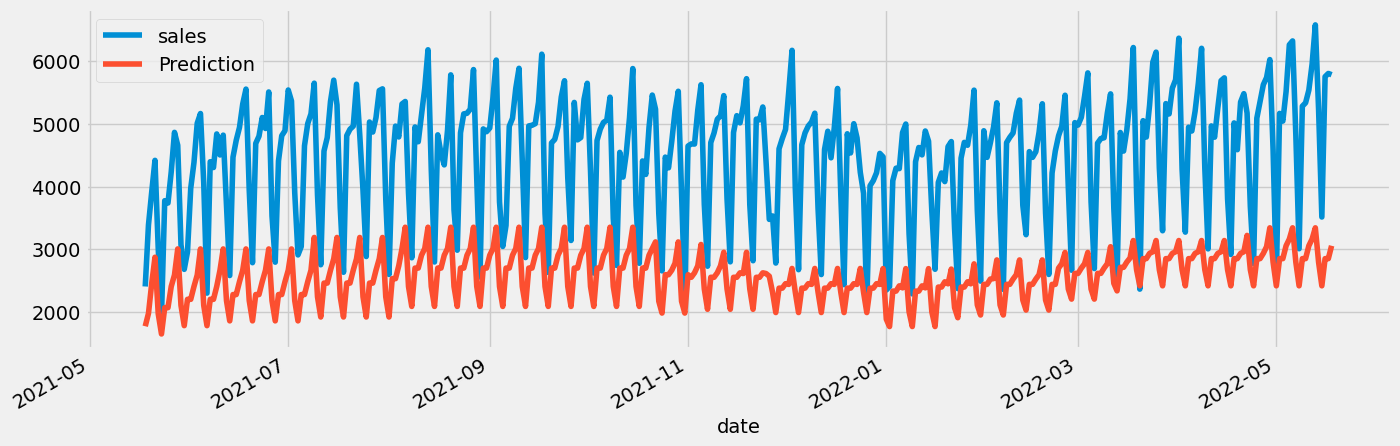

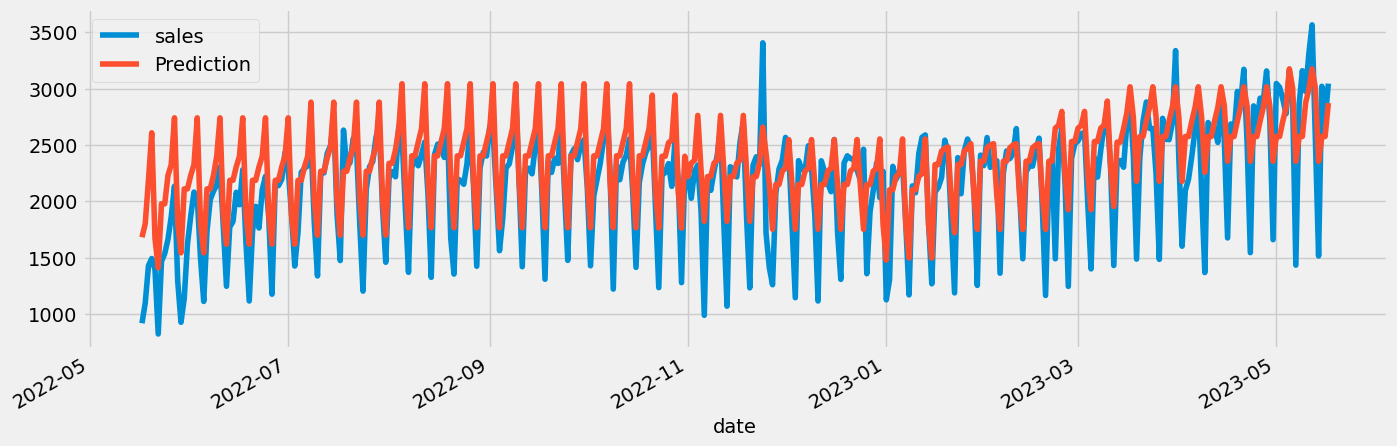

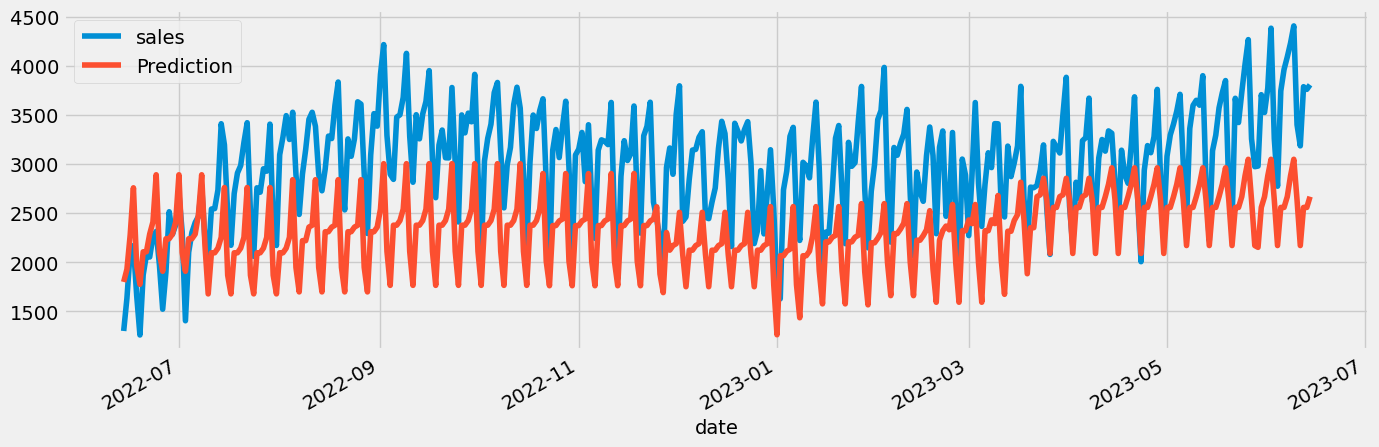

In [280]:
test_sales['Prediction'] = reg.predict(X_test)
for site_id in unique_site_ids:
    all = pd.concat([test_sales[test_sales['site_id_msba'] == site_id],
                     train_sales[train_sales['site_id_msba'] == site_id]], sort=False)
    _ = all[['sales','Prediction']].plot(figsize=(15, 5))

In [291]:
for site_id in unique_site_ids:
    test = test_sales[test_sales['site_id_msba'] == site_id]
    print(f"These are the stats for store {site_id}.")
    MSE = mean_squared_error(test['sales'],
                   test['Prediction'])
    print(f"MSE is {MSE}")
    RMSE = math.sqrt(MSE)
    print(f"RMSE is {RMSE}")
    MAE = mean_absolute_error(y_true=test['sales'],
                   y_pred=test['Prediction'])
    print(f"MAE is {MAE}")
    MAPE = mean_absolute_percentage_error(y_true=test['sales'],
                   y_pred=test['Prediction'])
    print(f"MAPE is {MAPE}\n")

These are the stats for store 22015
MSE is 447531.8511547062
RMSE is 668.9782142601553
MAE is 533.4725445349856
MAPE is 16.09926695153514

These are the stats for store 22260
MSE is 548808.7328304661
RMSE is 740.8162611811825
MAE is 619.1799644595287
MAPE is 19.96595289767719

These are the stats for store 22540
MSE is 203784.0109286686
RMSE is 451.4244243820538
MAE is 372.80011285700556
MAPE is 13.043285357895071

These are the stats for store 22750
MSE is 4185766.476854414
RMSE is 2045.9145820034653
MAE is 1924.0357975767374
MAPE is 41.12682298738023

These are the stats for store 23905
MSE is 113464.6610702537
RMSE is 336.8451588938955
MAE is 257.57132946177
MAPE is 14.630115373650678

These are the stats for store 24535
MSE is 610404.6111404152
RMSE is 781.2839503921831
MAE is 705.1464920487534
MAPE is 22.828941517812474



In [292]:
columns_to_remove = ['sales', 'diesel_y', 'unleaded']
train_food = train_xgb.drop(columns=columns_to_remove)
test_food = test_xgb.drop(columns=columns_to_remove)

In [294]:
X_train, y_train = create_model(train_food, label='food')
X_test, y_test = create_model(test_food, label='food')

In [295]:
reg = xgb.XGBRegressor(n_estimators=1000, enable_categorical=True)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

/Users/macbookair/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

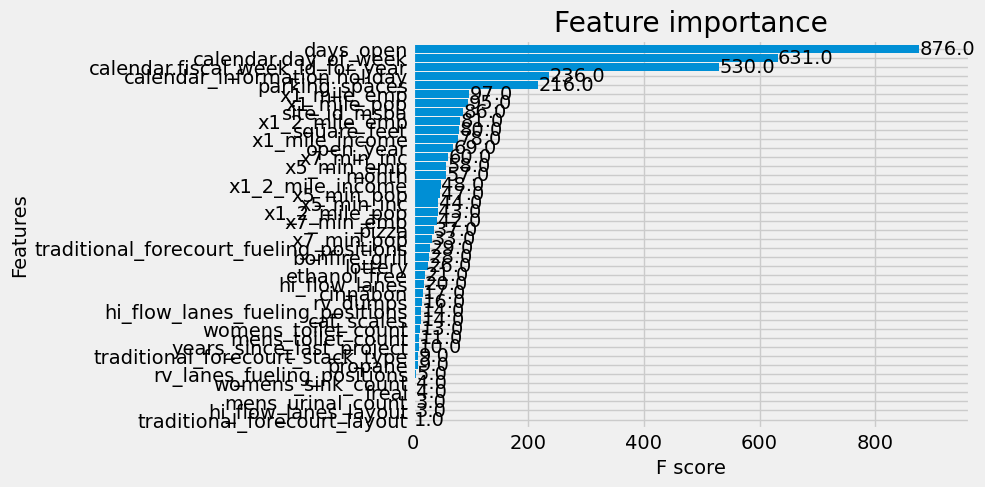

In [297]:
_ = plot_importance(reg, height=0.9)

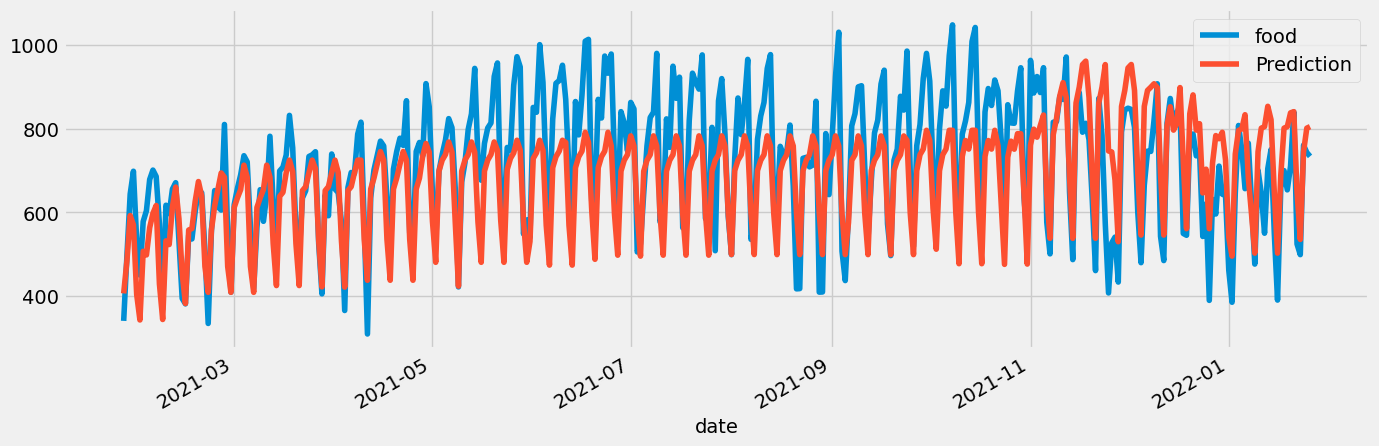

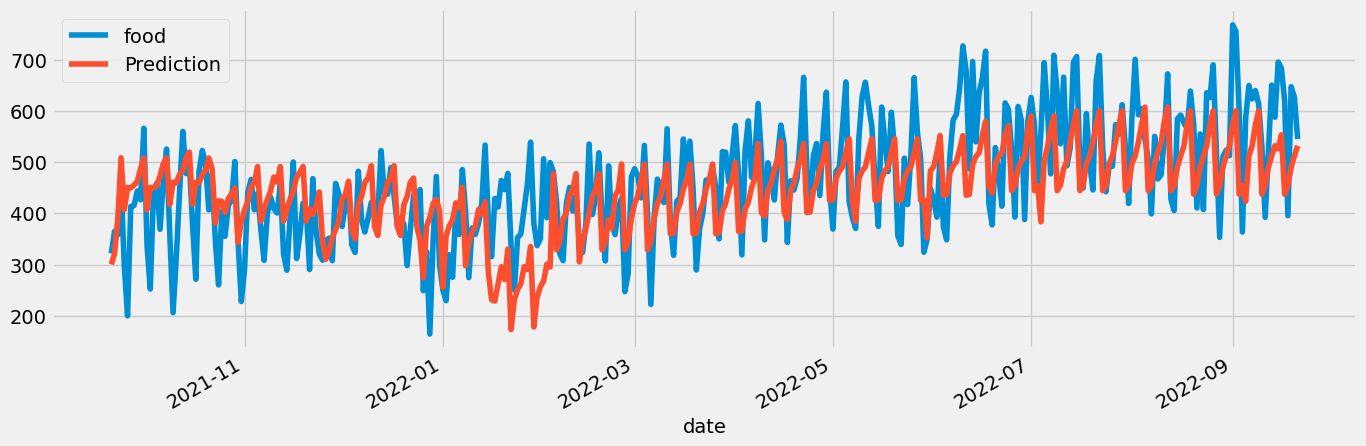

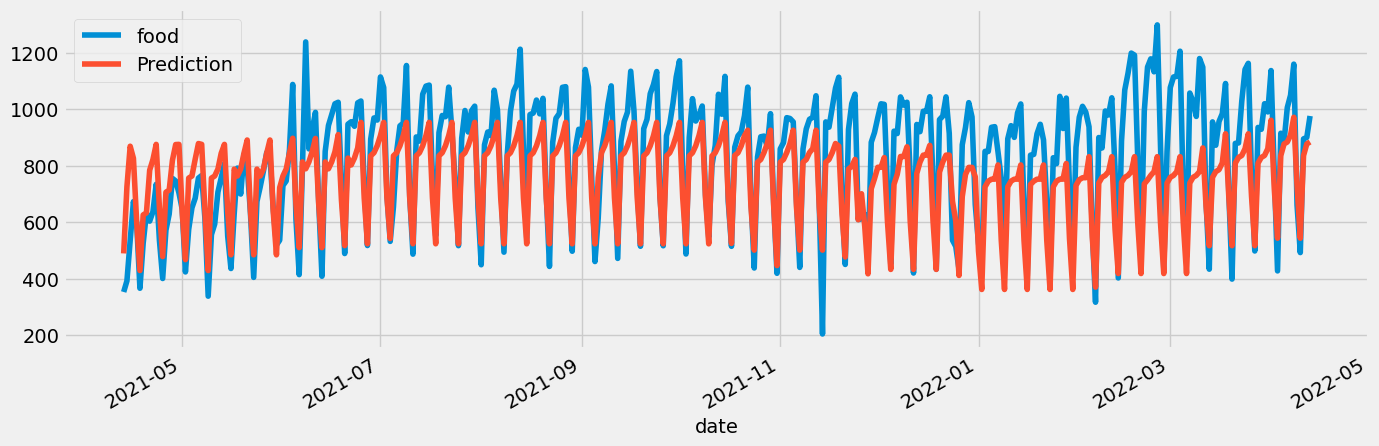

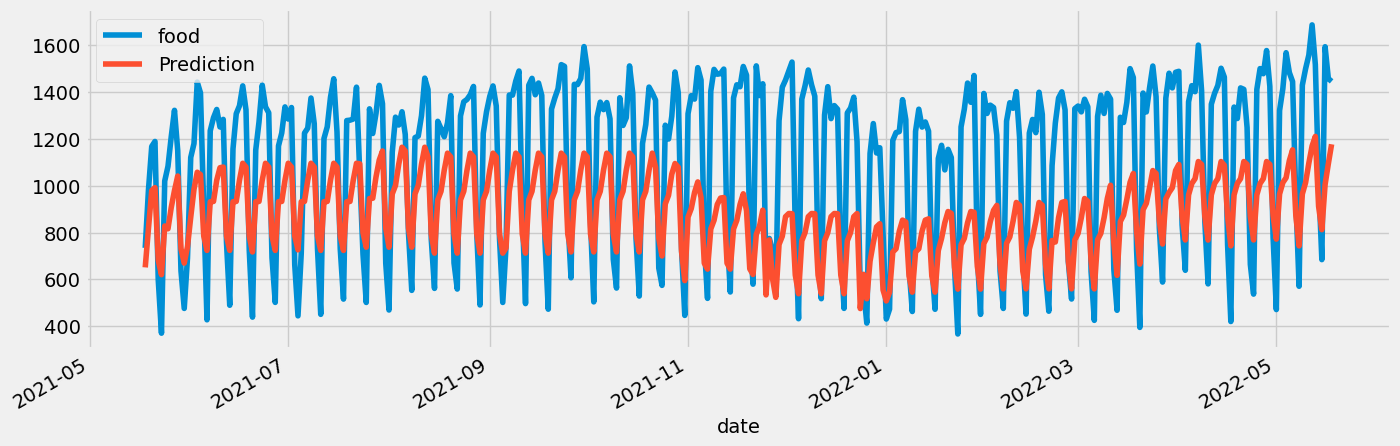

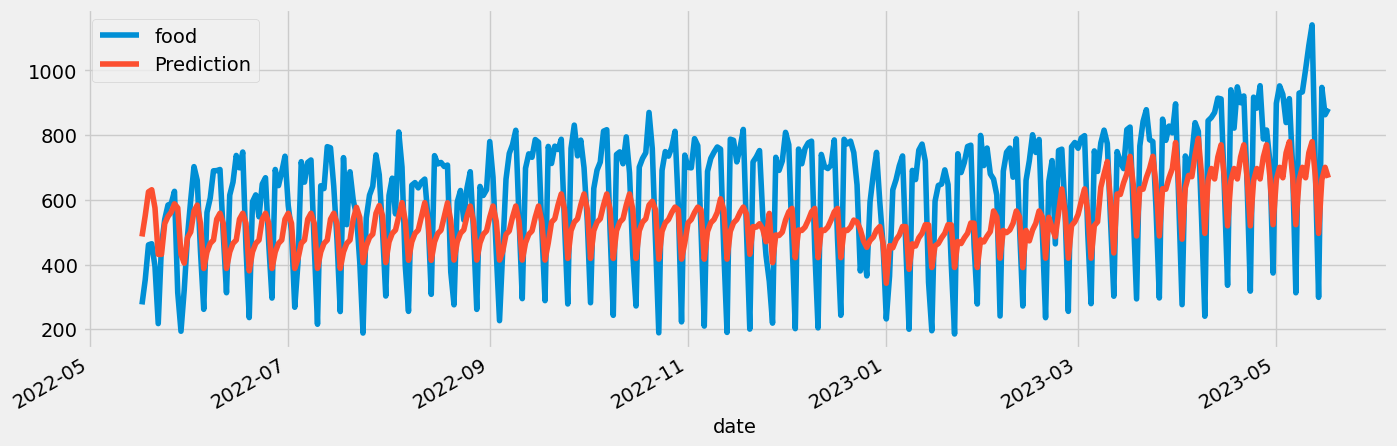

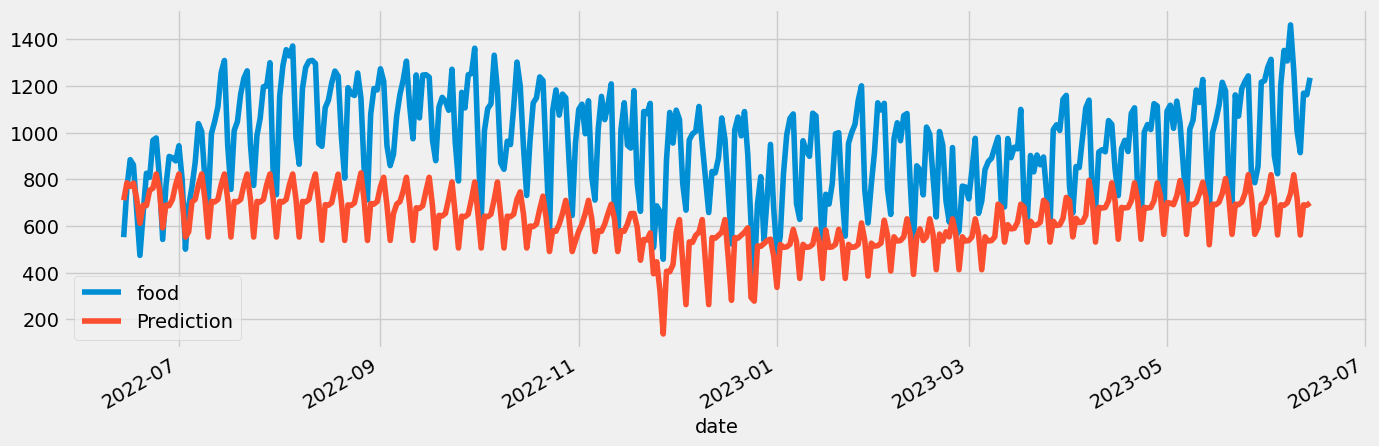

In [298]:
test_food['Prediction'] = reg.predict(X_test)
for site_id in unique_site_ids:
    all = pd.concat([test_food[test_food['site_id_msba'] == site_id],
                     train_food[train_food['site_id_msba'] == site_id]], sort=False)
    _ = all[['food','Prediction']].plot(figsize=(15, 5))

In [299]:
for site_id in unique_site_ids:
    test = test_food[test_food['site_id_msba'] == site_id]
    print(f"These are the stats for store {site_id}.")
    MSE = mean_squared_error(test['food'],
                   test['Prediction'])
    print(f"MSE is {MSE}")
    RMSE = math.sqrt(MSE)
    print(f"RMSE is {RMSE}")
    MAE = mean_absolute_error(y_true=test['food'],
                   y_pred=test['Prediction'])
    print(f"MAE is {MAE}")
    MAPE = mean_absolute_percentage_error(y_true=test['food'],
                   y_pred=test['Prediction'])
    print(f"MAPE is {MAPE}\n")

These are the stats for store 22015.
MSE is 11527.492962543261
RMSE is 107.36616302421942
MAE is 86.9326178231995
MAPE is 12.306990984143997

These are the stats for store 22260.
MSE is 7690.276227031084
RMSE is 87.69422003205847
MAE is 69.7469802092672
MAPE is 16.19602683672762

These are the stats for store 22540.
MSE is 21940.172286594152
RMSE is 148.12215326072652
MAE is 118.59623687443967
MAPE is 14.179625394184034

These are the stats for store 22750.
MSE is 118898.90487446153
RMSE is 344.81720501515224
MAE is 301.6186866261633
MAPE is 26.26044049689212

These are the stats for store 23905.
MSE is 31349.791579329947
RMSE is 177.0587235335496
MAE is 160.22173460646667
MAPE is 29.52836027925565

These are the stats for store 24535.
MSE is 138453.5578578605
RMSE is 372.0934799991267
MAE is 336.478025882575
MAPE is 33.55642024445408



In [300]:
columns_to_remove = ['sales', 'food', 'unleaded']
train_diesel = train_xgb.drop(columns=columns_to_remove)
test_diesel = test_xgb.drop(columns=columns_to_remove)

In [301]:
X_train, y_train = create_model(train_diesel, label='diesel_y')
X_test, y_test = create_model(test_diesel, label='diesel_y')

In [302]:
reg = xgb.XGBRegressor(n_estimators=1000, enable_categorical=True)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

/Users/macbookair/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

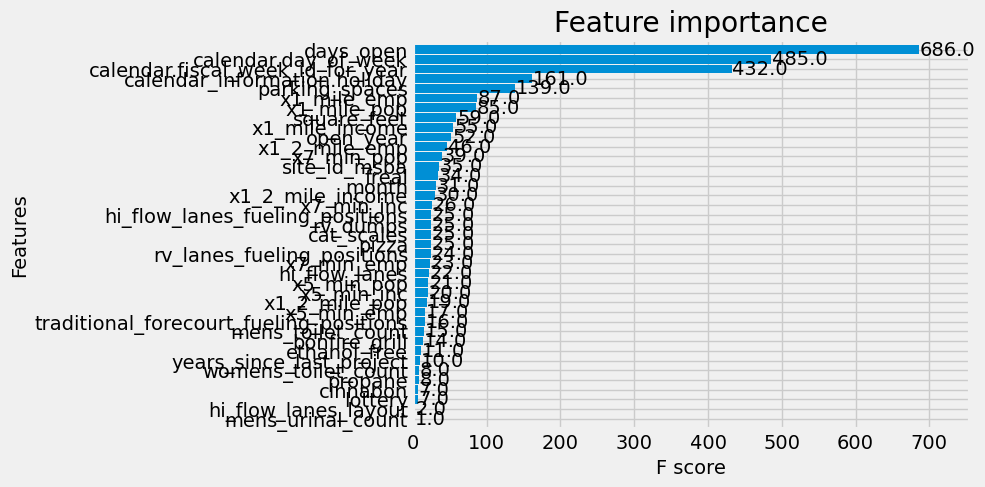

In [303]:
_ = plot_importance(reg, height=0.9)

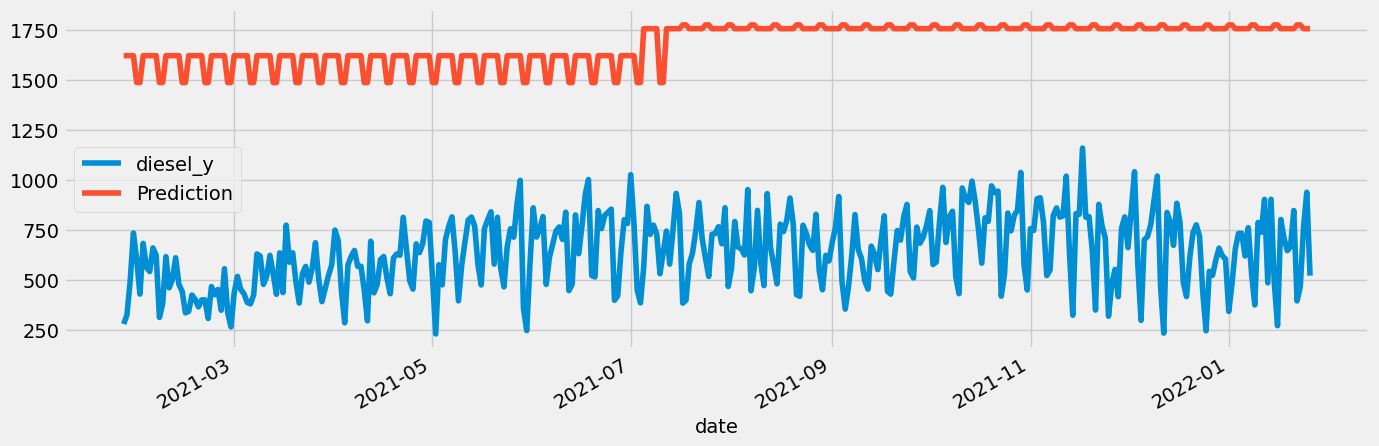

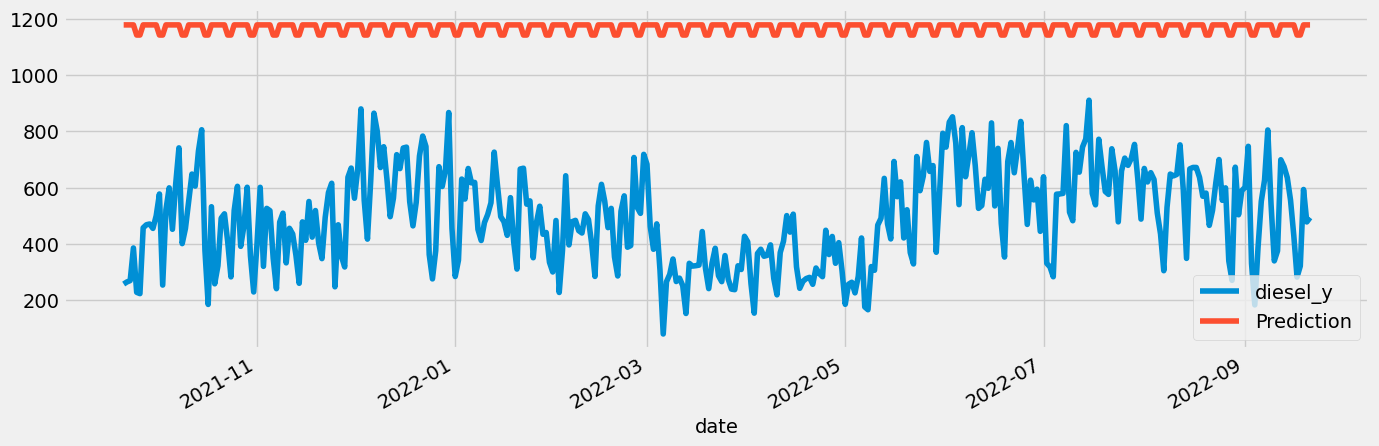

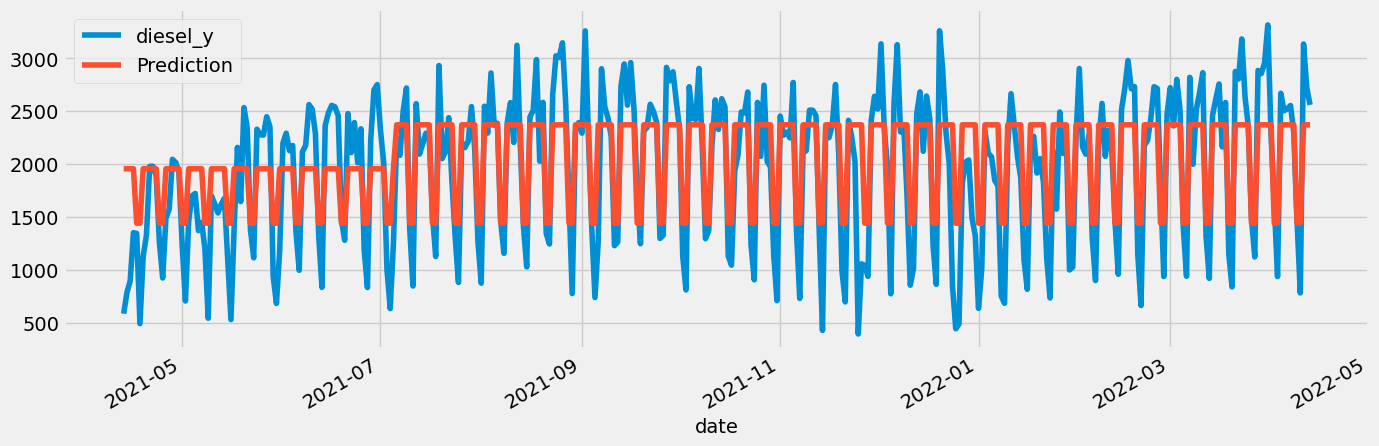

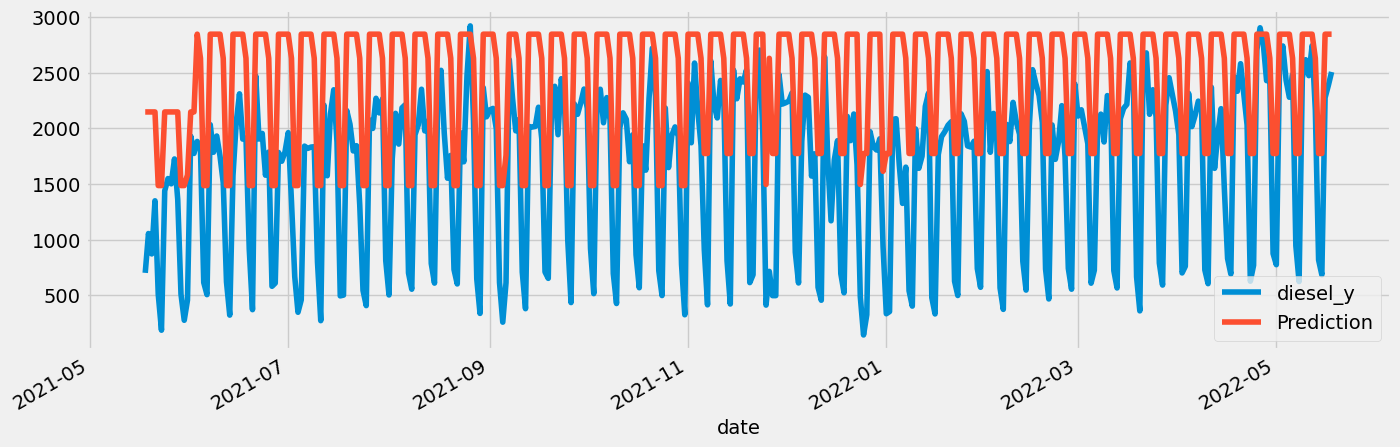

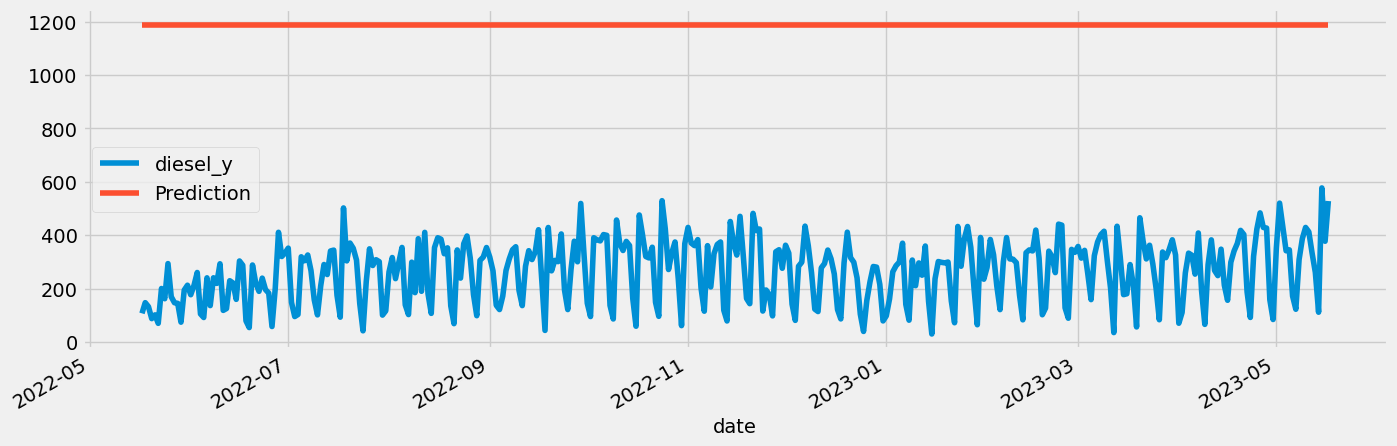

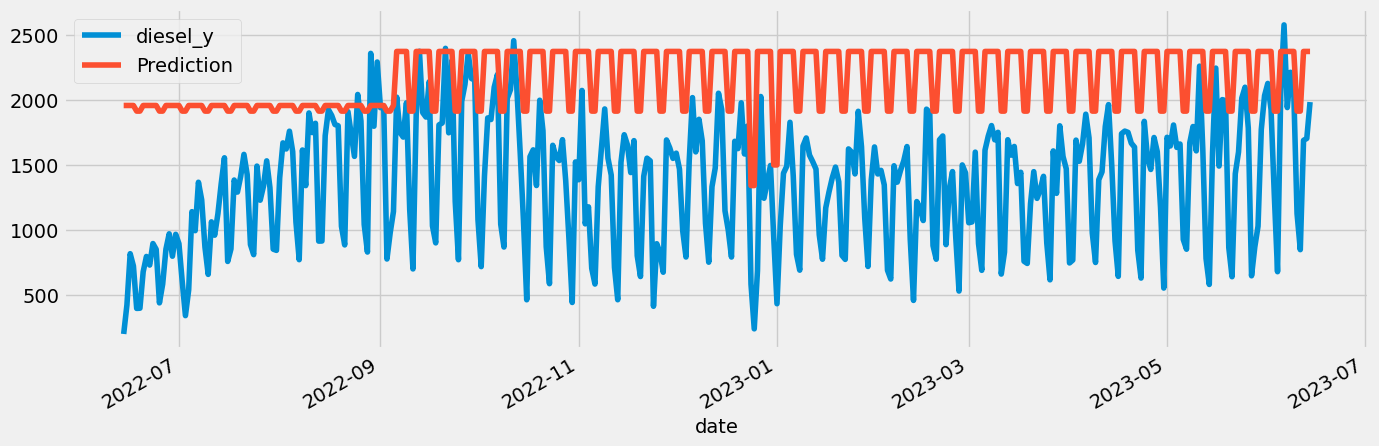

In [304]:
test_diesel['Prediction'] = reg.predict(X_test)
for site_id in unique_site_ids:
    all = pd.concat([test_diesel[test_diesel['site_id_msba'] == site_id],
                     train_diesel[train_diesel['site_id_msba'] == site_id]], sort=False)
    _ = all[['diesel_y','Prediction']].plot(figsize=(15, 5))

In [305]:
for site_id in unique_site_ids:
    test = test_diesel[test_diesel['site_id_msba'] == site_id]
    print(f"These are the stats for store {site_id}.")
    MSE = mean_squared_error(test['diesel_y'],
                   test['Prediction'])
    print(f"MSE is {MSE}")
    RMSE = math.sqrt(MSE)
    print(f"RMSE is {RMSE}")
    MAE = mean_absolute_error(y_true=test['diesel_y'],
                   y_pred=test['Prediction'])
    print(f"MAE is {MAE}")
    MAPE = mean_absolute_percentage_error(y_true=test['diesel_y'],
                   y_pred=test['Prediction'])
    print(f"MAPE is {MAPE}\n")

These are the stats for store 22015.
MSE is 1120425.9339019496
RMSE is 1058.5017401506477
MAE is 1044.3186566875854
MAPE is 189.04704118246582

These are the stats for store 22260.
MSE is 477255.9173093394
RMSE is 690.8371134423363
MAE is 671.5865909643954
MAPE is 171.08029112031377

These are the stats for store 22540.
MSE is 199493.08077869564
RMSE is 446.6464830027162
MAE is 350.3312090377391
MAPE is 27.43159263207436

These are the stats for store 22750.
MSE is 772584.6472307893
RMSE is 878.9679443704357
MAE is 812.7858352944629
MAPE is 91.55500320032826

These are the stats for store 23905.
MSE is 862639.0274834434
RMSE is 928.783627915266
MAE is 921.4759784942793
MAPE is 515.2396049825106

These are the stats for store 24535.
MSE is 794948.4625548866
RMSE is 891.5988237738353
MAE is 814.5958203872098
MAPE is 85.73163646476443



In [311]:
columns_to_remove = ['sales', 'food', 'diesel_y']
train_gas = train_xgb.drop(columns=columns_to_remove)
test_gas = test_xgb.drop(columns=columns_to_remove)

In [312]:
X_train, y_train = create_model(train_gas, label='unleaded')
X_test, y_test = create_model(test_gas, label='unleaded')

In [313]:
reg = xgb.XGBRegressor(n_estimators=1000, enable_categorical=True)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

/Users/macbookair/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

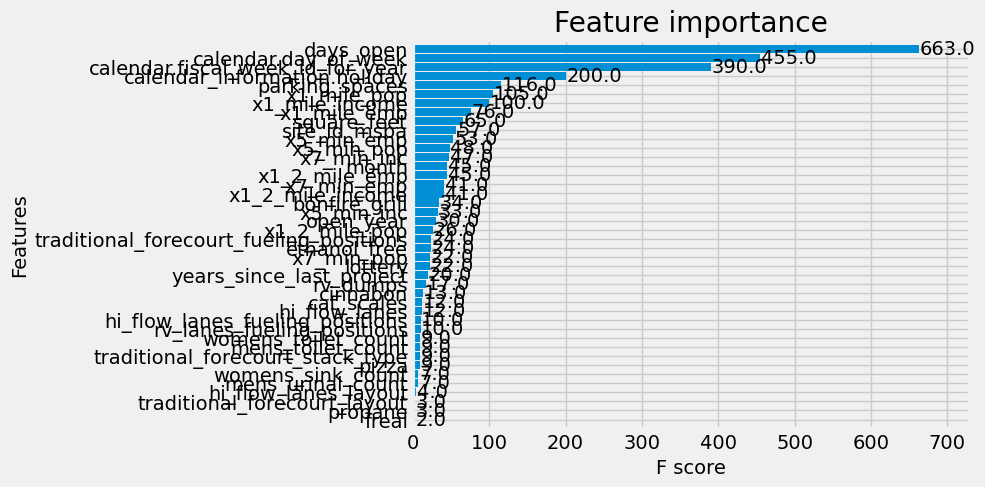

In [314]:
_ = plot_importance(reg, height=0.9)

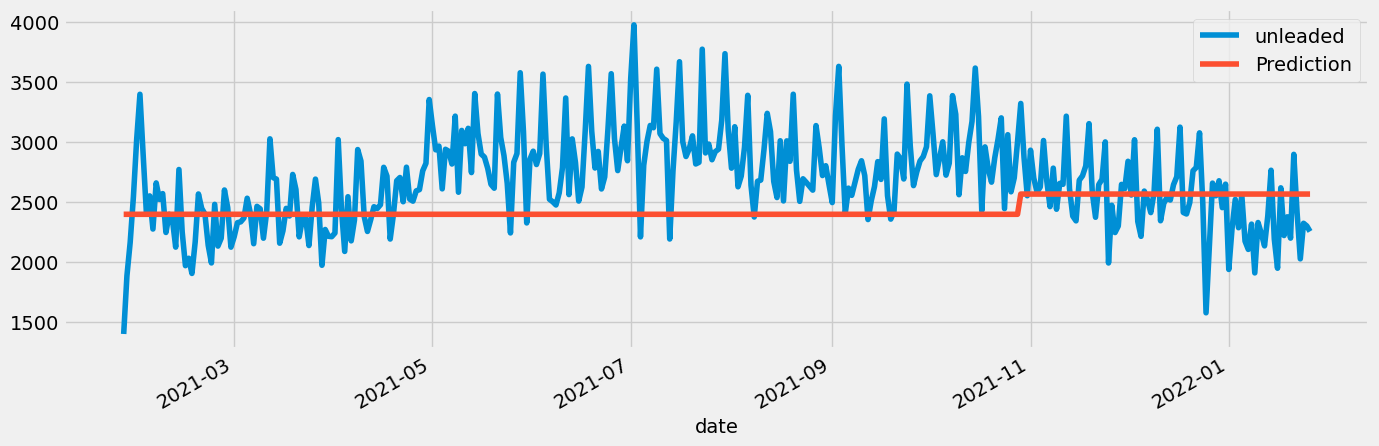

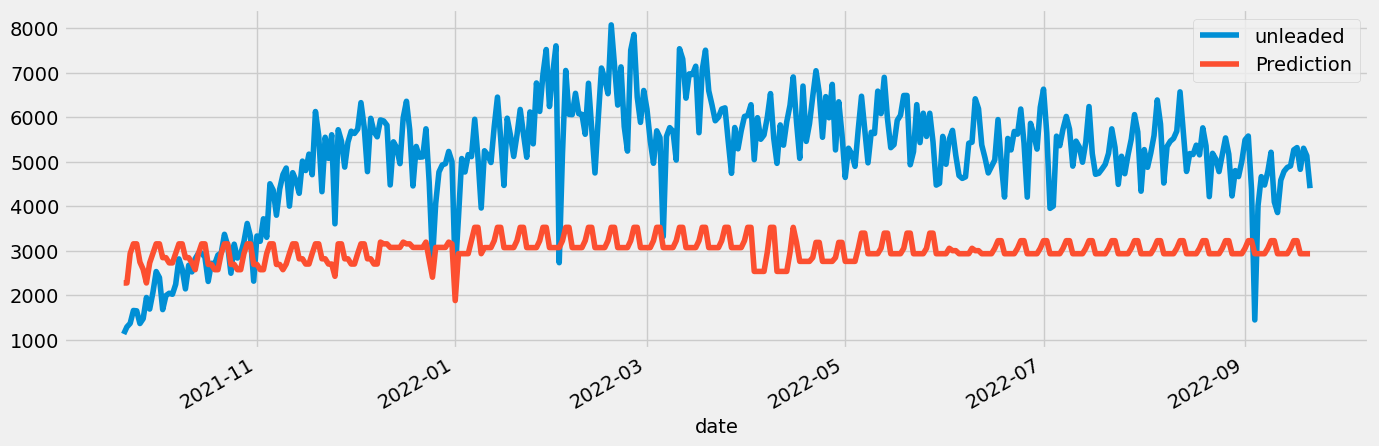

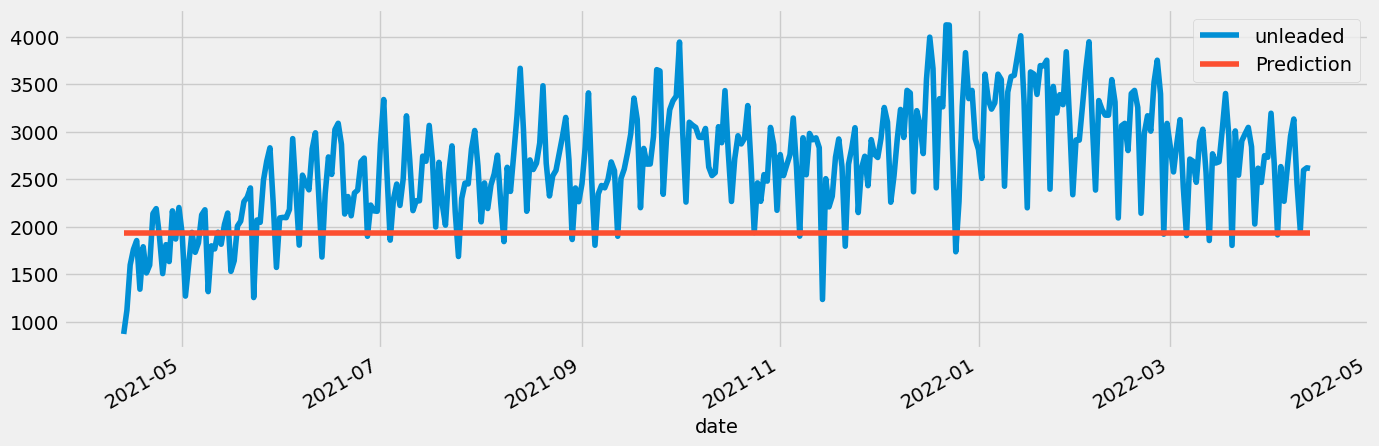

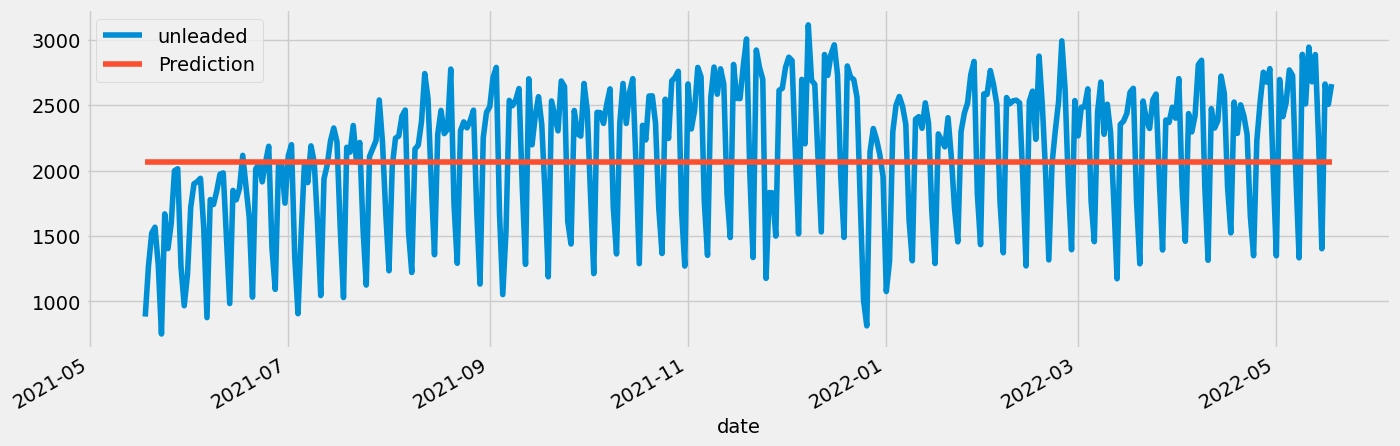

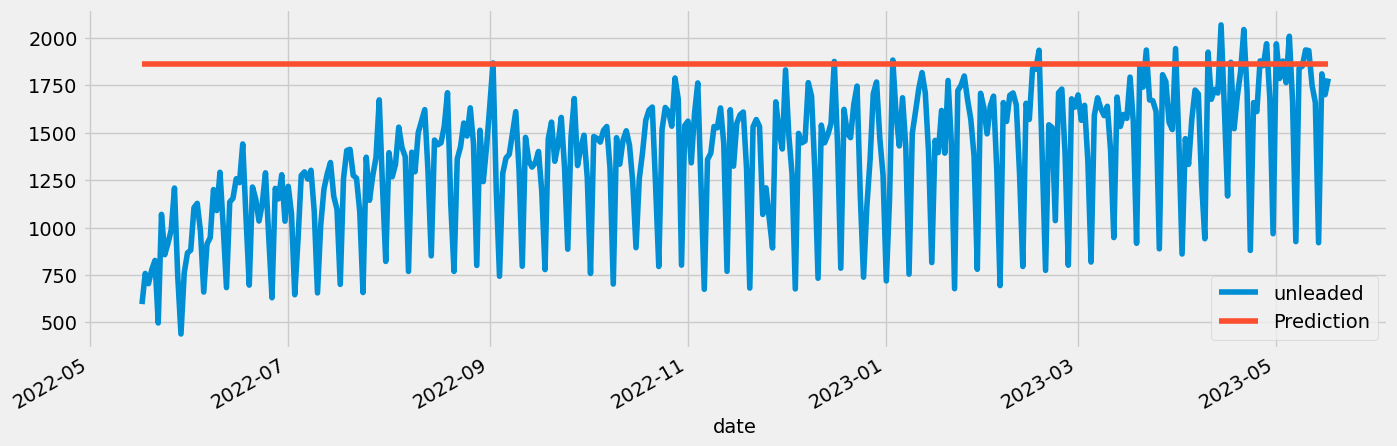

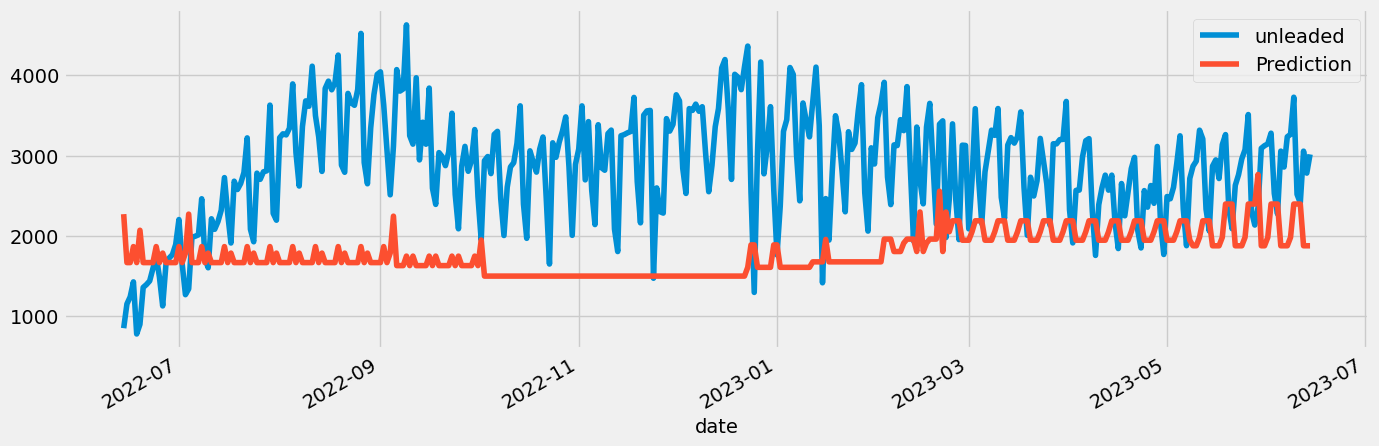

In [316]:
test_gas['Prediction'] = reg.predict(X_test)
for site_id in unique_site_ids:
    all = pd.concat([test_gas[test_gas['site_id_msba'] == site_id],
                     train_gas[train_gas['site_id_msba'] == site_id]], sort=False)
    _ = all[['unleaded','Prediction']].plot(figsize=(15, 5))

In [317]:
for site_id in unique_site_ids:
    test = test_gas[test_gas['site_id_msba'] == site_id]
    print(f"These are the stats for store {site_id}.")
    MSE = mean_squared_error(test['unleaded'],
                   test['Prediction'])
    print(f"MSE is {MSE}")
    RMSE = math.sqrt(MSE)
    print(f"RMSE is {RMSE}")
    MAE = mean_absolute_error(y_true=test['unleaded'],
                   y_pred=test['Prediction'])
    print(f"MAE is {MAE}")
    MAPE = mean_absolute_percentage_error(y_true=test['unleaded'],
                   y_pred=test['Prediction'])
    print(f"MAPE is {MAPE}\n")

These are the stats for store 22015.
MSE is 226216.3834559926
RMSE is 475.6221015217781
MAE is 373.05562924778013
MAPE is 13.254618321496475

These are the stats for store 22260.
MSE is 5801035.464309594
RMSE is 2408.533882740617
MAE is 2215.4416617358265
MAPE is 42.02688023205333

These are the stats for store 22540.
MSE is 863663.6643127453
RMSE is 929.3350656855391
MAE is 786.1469199005295
MAPE is 27.499242179357825

These are the stats for store 22750.
MSE is 281550.3553671659
RMSE is 530.6131880825861
MAE is 458.11578930797475
MAPE is 25.246493118263352

These are the stats for store 23905.
MSE is 364257.6312121194
RMSE is 603.537597181915
MAE is 500.3857055050375
MAPE is 48.73062713646479

These are the stats for store 24535.
MSE is 1779496.0543953408
RMSE is 1333.9775314432177
MAE is 1145.0064231797517
MAPE is 37.56762433303745

